## HOUSING: PRICE PREDICTION

### Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. 
##### Predictive modelling, Market mix modelling,  recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. 
Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:

#### • Which variables are important to predict the price of variable?
#### • How do these variables describe the price of the house?

### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.
Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file

### Importing the necessary libraries

In [346]:
import numpy as np #mathematical and linear algebric calculations
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns
import math 

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [355]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder,PowerTransformer

from scipy.stats import zscore 
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [81]:
#import train  datasets and convert them into dataframes
train_df = pd.read_csv('train.csv')

pd.set_option('display.max_columns', None)
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

In [82]:
#import test  datasets and convert them into dataframes
test_df = pd.read_csv('test.csv')

pd.set_option('display.max_columns', None)
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

## Exploratory Data Analysis:
EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

Let us check the descriptive statistics of the datasets

In [4]:
#Shape of train data set
print('*********** SHAPE ***********\n',train_df.shape,'\n')

*********** SHAPE ***********
 (1168, 81) 



In [5]:
print('***********DESCRIPTIVE STATS***********')
train_df.describe().transpose()    

***********DESCRIPTIVE STATS***********


count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [6]:
#Summary of train data set
print('*********** Summary of train data ***********\n')
train_df.info()

*********** Summary of train data ***********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  Overa

In [7]:
#Shape of test data set
print('*********** SHAPE ***********')
test_df.shape

*********** SHAPE ***********


(292, 80)

In [8]:
print('***********DESCRIPTIVE STATS***********')
test_df.describe().transpose()    

***********DESCRIPTIVE STATS***********


count          mean           std     min      25%     50%  \
Id             292.0    755.955479    442.565228     6.0   377.75   778.0   
MSSubClass     292.0     57.414384     43.780649    20.0    20.00    50.0   
LotFrontage    247.0     66.425101     21.726343    21.0    53.50    65.0   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00  9200.0   
OverallQual    292.0      6.078767      1.356147     3.0     5.00     6.0   
OverallCond    292.0      5.493151      1.063267     3.0     5.00     5.0   
YearBuilt      292.0   1972.616438     30.447016  1872.0  1954.00  1976.0   
YearRemodAdd   292.0   1985.294521     20.105792  1950.0  1968.00  1994.0   
MasVnrArea     291.0    109.171821    175.030021     0.0     0.00     0.0   
BsmtFinSF1     292.0    439.294521    429.559675     0.0     0.00   369.5   
BsmtFinSF2     292.0     46.157534    152.467119     0.0     0.00     0.0   
BsmtUnfSF      292.0    557.315068    411.043768     0.0   255.00   487.0   
TotalBsmtSF    292.0   1042.767123    424.561153     0.0   771.75   971.0   
1stFlrSF       292.0   1133.691781    366.941919   372.0   858.00  1047.5   
2ndFlrSF       292.0    339.657534    424.278825     0.0     0.00     0.0   
LowQualFinSF   292.0      3.702055     38.219527     0.0     0.00     0.0   
GrLivArea      292.0   1477.051370    514.199429   520.0  1061.50  1440.0   
BsmtFullBath   292.0      0.424658      0.508831     0.0     0.00     0.0   
BsmtHalfBath   292.0      0.065068      0.247070     0.0     0.00     0.0   
FullBath       292.0      1.575342      0.547856     0.0     1.00     2.0   
HalfBath       292.0      0.359589      0.494795     0.0     0.00     0.0   
BedroomAbvGr   292.0      2.794521      0.807336     0.0     2.00     3.0   
KitchenAbvGr   292.0      1.051370      0.236160     1.0     1.00     1.0   
TotRmsAbvGrd   292.0      6.417808      1.728105     3.0     5.00     6.0   
Fireplaces     292.0      0.595890      0.621259     0.0     0.00     1.0   
GarageYrBlt    275.0   1979.760000     23.868875  1916.0  1964.00  1979.0   
GarageCars     292.0      1.729452      0.754430     0.0     1.00     2.0   
GarageArea     292.0    457.458904    210.785591     0.0   300.00   467.5   
WoodDeckSF     292.0     86.397260    121.898836     0.0     0.00     0.0   
OpenPorchSF    292.0     47.061644     65.865449     0.0     0.00    28.5   
EnclosedPorch  292.0     17.708904     51.892906     0.0     0.00     0.0   
3SsnPorch      292.0      2.489726     30.247488     0.0     0.00     0.0   
ScreenPorch    292.0     15.099315     58.483473     0.0     0.00     0.0   
PoolArea       292.0      0.000000      0.000000     0.0     0.00     0.0   
PoolQC           0.0           NaN           NaN     NaN      NaN     NaN   
MiscVal        292.0     28.184932    224.036218     0.0     0.00     0.0   
MoSold         292.0      6.232877      2.774556     1.0     4.00     6.0   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00  2008.0   

                    75%       max  
Id              1152.25    1456.0  
MSSubClass        70.00     190.0  
LotFrontage       79.00     150.0  
LotArea        11658.75  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2009.0  
YearRemodAdd    2003.25    2010.0  
MasVnrArea       180.00    1031.0  
BsmtFinSF1       700.50    1767.0  
BsmtFinSF2         0.00    1085.0  
BsmtUnfSF        780.00    1935.0  
TotalBsmtSF     1322.00    3094.0  
1stFlrSF        1370.50    2402.0  
2ndFlrSF         717.00    1589.0  
LowQualFinSF       0.00     479.0  
GrLivArea       1720.25    3447.0  
BsmtFullBath       1.00       2.0  
BsmtHalfBath       0.00       1.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       6.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      12.0  
Fireplaces         1.00       2.0  
GarageYrBlt     2003.00    2010.0  
GarageCars         2.00       4.0  
Gar

In [9]:
#Summary of train data set
print('*********** Summary of train data ***********\n')
test_df.info()

*********** Summary of train data ***********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  Overall

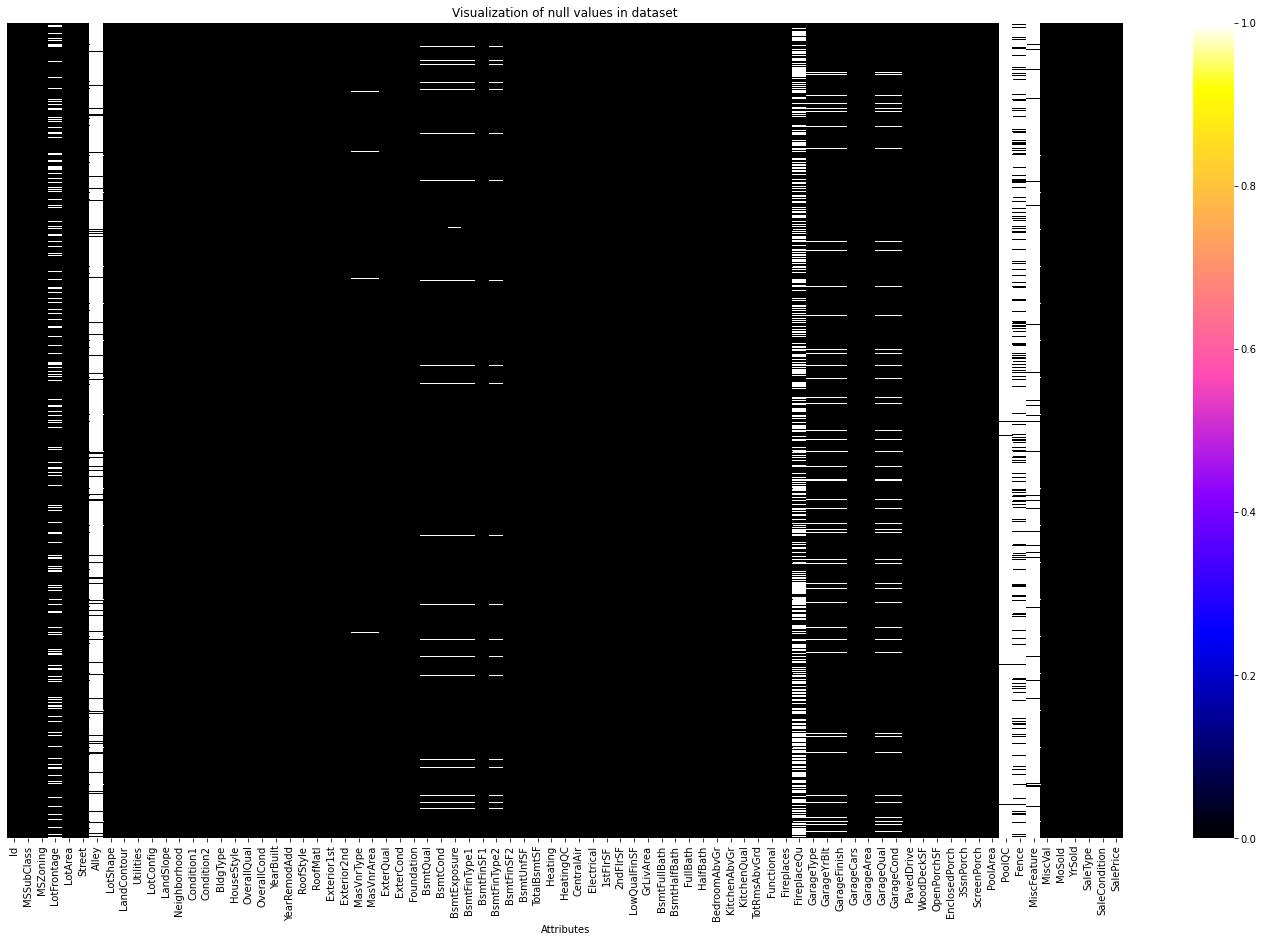

In [10]:
#let us check the null values present using heat map visualization technique

plt.figure(figsize=(25,15), facecolor='white')
sns.heatmap(train_df.isnull(),cmap='gnuplot2', yticklabels=False)
plt.xlabel('Attributes')
plt.title('Visualization of null values in dataset')
plt.show()

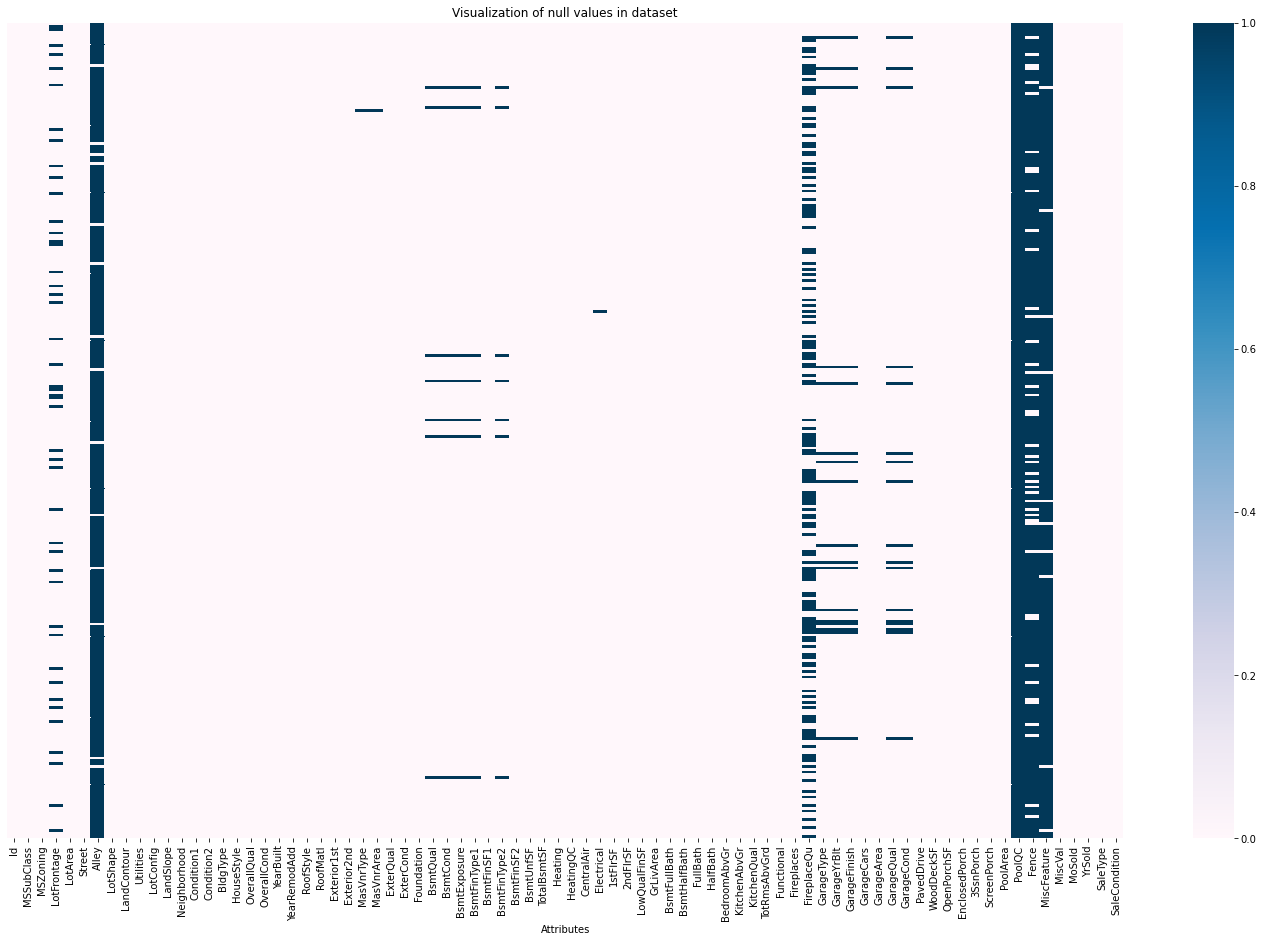

In [11]:
#let us check the null values present using heat map visualization technique

plt.figure(figsize=(25,15), facecolor='white')
sns.heatmap(test_df.isnull(),cmap='PuBu',yticklabels=False )
plt.xlabel('Attributes')
plt.title('Visualization of null values in dataset')
plt.show()

## Observations:
1. There are 1169 rows and 81 columns in the training dataset and 292 rows and 80 columns in testing data set as target variable is missing in test dataset missing.
2. There are 43 categorical columns in the datset, we can see there are null values in the attributes which are need to be treated.

### To analyse the data let us combine both train and test data set in order to apply all methods on datasets.

In [91]:
#adding the labels to both datasets to understand the source of data
train_df['label'] = 'train'
test_df['label']='test'

#checking the shape of both test and train data
train_df.shape, test_df.shape

((1168, 82), (292, 81))

In [220]:
#using concat method to combine both dataset
df = pd.concat([train_df, test_df],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1456         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1457         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
1458         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
1459         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     1Story            8            5       2007   
1456       Norm     1Fam     1Story            5            5       1994   
1457       Norm     1Fam     1Story            6            7       1970   
1458       Norm     1Fam     1.5Fin            6            7       1947   
1459       Norm    Twnhs     2Story            6            5       1973   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1455          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
1456          1995     Gable  CompShg     VinylSd     VinylSd       None   
1457          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1458          1950     Gable  CompShg     CemntBd     CmentBd       None   
1459          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   

In [15]:
df.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

## Data Visualization

Let us create a function to visualize categorical columns and numerical columns in the dataset seperately and call the function.

In [16]:
#function to fetch details for categorical columns and plot count plot
def cat_details(data):
    print('Attribute name: ',data)
    print('Null values:\n',df[data].isna().sum())
    print("Unique values:\n", df[data].value_counts())
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[data],data=df)  
    plt.title('Visualisation of {}'.format(data))
    plt.show()
    
#function to fetch details for numerical columns and plot distplot which helps us to understand distribution of the values
def num_details(data):
    print('Attribute name: ',data)
    print('Null values:\n',df[data].isna().sum())
    print("Unique values:\n", df[data].value_counts())
    plt.figure(figsize=(8,6))
    sns.distplot(df[data])      
    plt.title('Distribution of {}'.format(data))
    plt.show()
    

In [17]:
#fetching column names of the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Attribute name:  MSSubClass
Null values:
 0
Unique values:
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


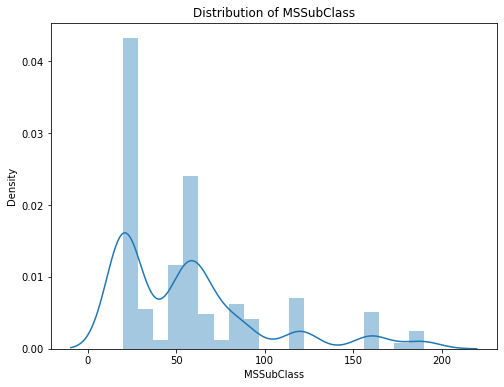

Attribute name:  MSZoning
Null values:
 0
Unique values:
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


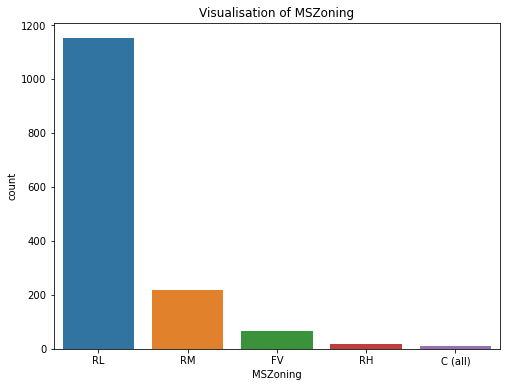

Attribute name:  LotFrontage
Null values:
 259
Unique values:
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
153.0      1
144.0      1
39.0       1
168.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


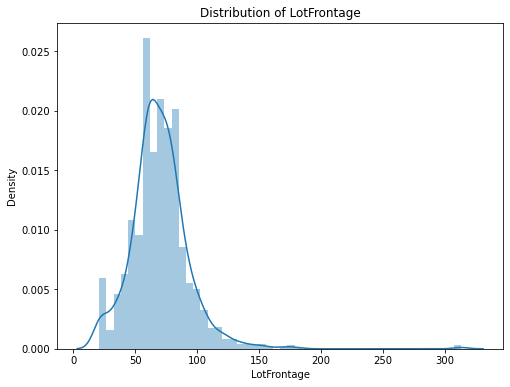

Attribute name:  LotArea
Null values:
 0
Unique values:
 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
6858      1
13005     1
8910      1
17104     1
8190      1
Name: LotArea, Length: 1073, dtype: int64


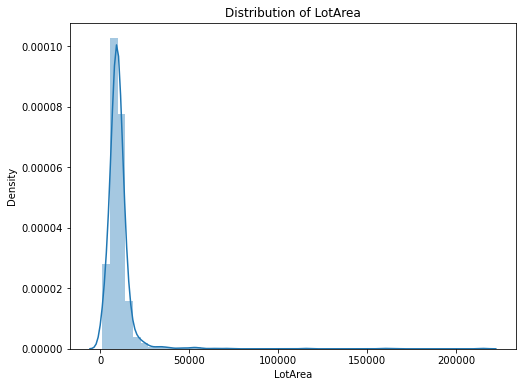

Attribute name:  Street
Null values:
 0
Unique values:
 Pave    1454
Grvl       6
Name: Street, dtype: int64


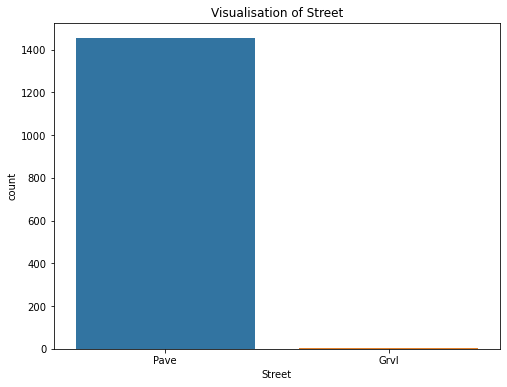

Attribute name:  LotShape
Null values:
 0
Unique values:
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


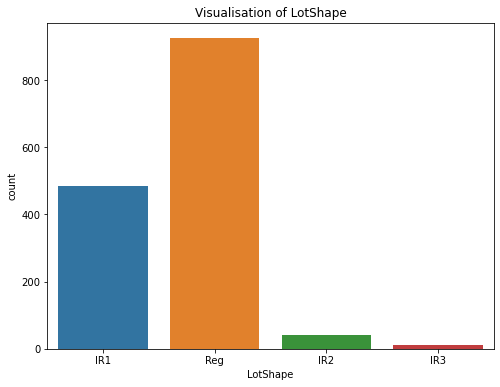

Attribute name:  LandContour
Null values:
 0
Unique values:
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


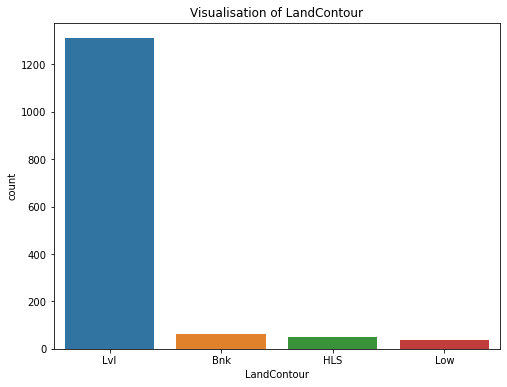

Attribute name:  Utilities
Null values:
 0
Unique values:
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


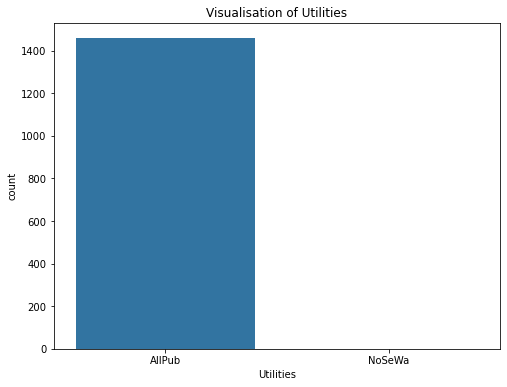

Attribute name:  LotConfig
Null values:
 0
Unique values:
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


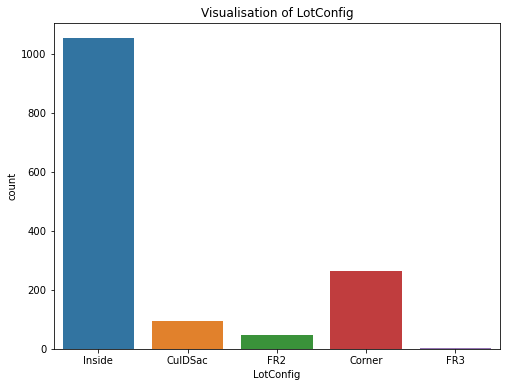

Attribute name:  LandSlope
Null values:
 0
Unique values:
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


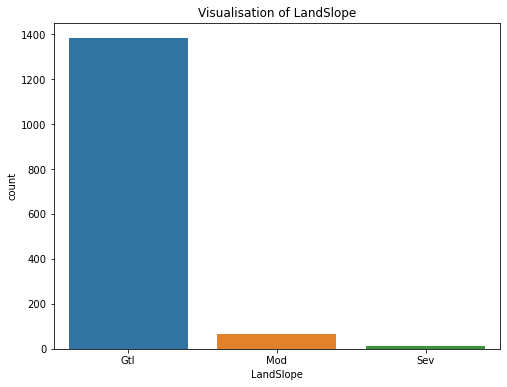

Attribute name:  Neighborhood
Null values:
 0
Unique values:
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


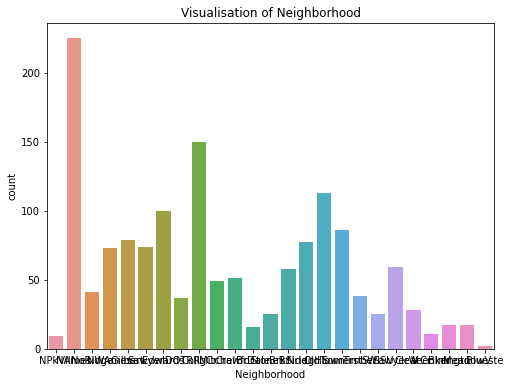

Attribute name:  Condition1
Null values:
 0
Unique values:
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


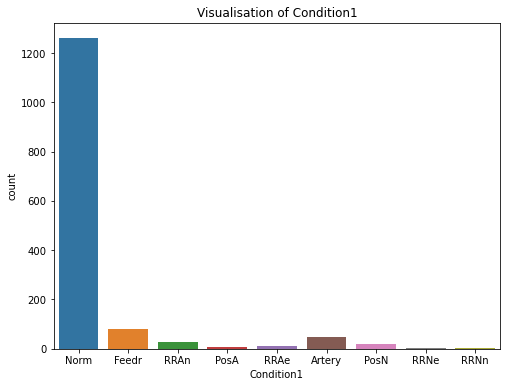

Attribute name:  Condition2
Null values:
 0
Unique values:
 Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


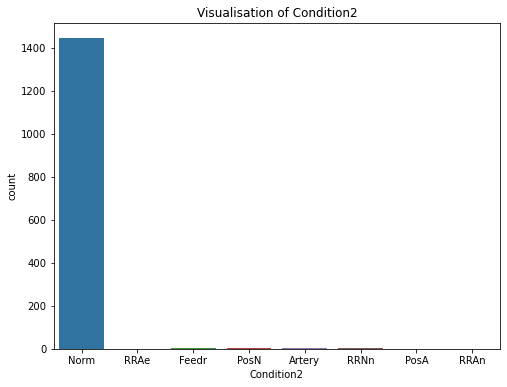

Attribute name:  BldgType
Null values:
 0
Unique values:
 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


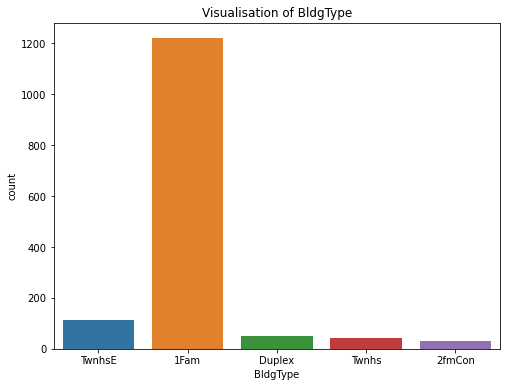

Attribute name:  HouseStyle
Null values:
 0
Unique values:
 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


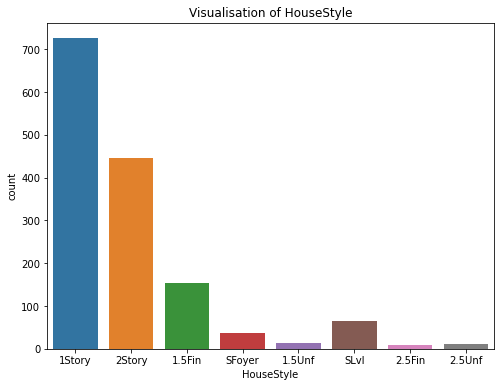

Attribute name:  OverallQual
Null values:
 0
Unique values:
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


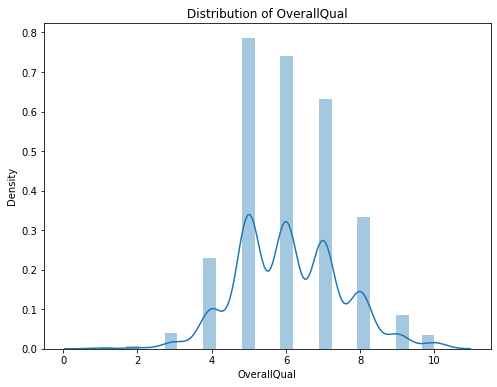

Attribute name:  OverallCond
Null values:
 0
Unique values:
 5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


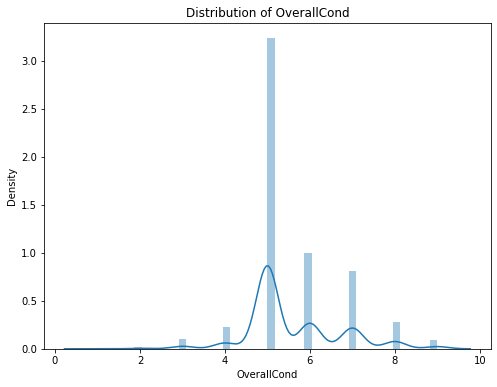

Attribute name:  YearBuilt
Null values:
 0
Unique values:
 2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64


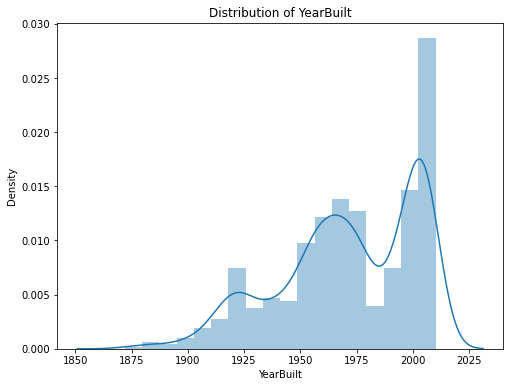

Attribute name:  YearRemodAdd
Null values:
 0
Unique values:
 1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1986      5
1952      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


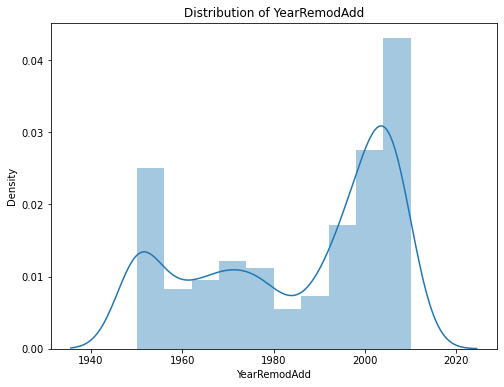

Attribute name:  RoofStyle
Null values:
 0
Unique values:
 Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


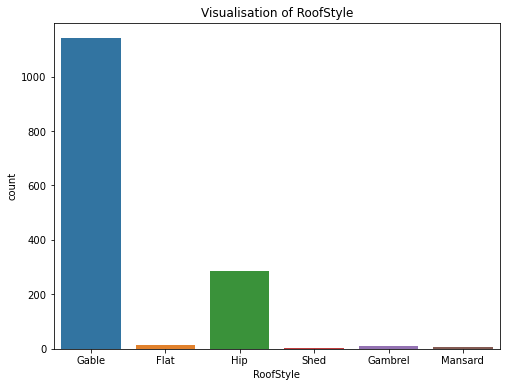

Attribute name:  RoofMatl
Null values:
 0
Unique values:
 CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Metal         1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64


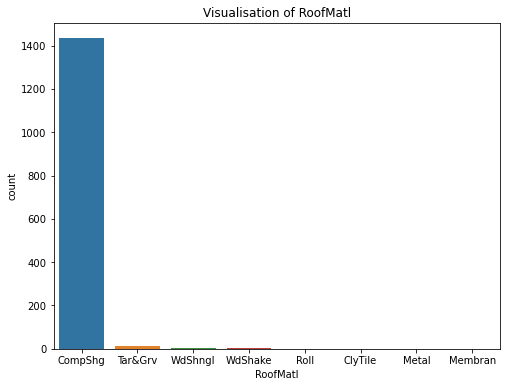

Attribute name:  Exterior1st
Null values:
 0
Unique values:
 VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


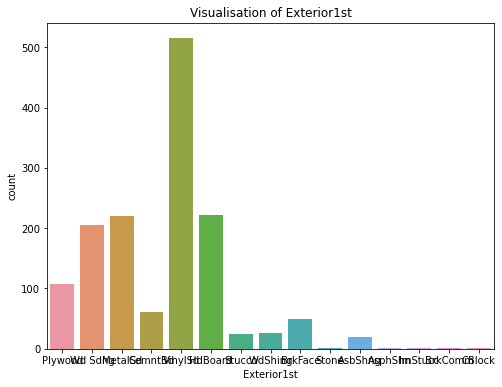

Attribute name:  Exterior2nd
Null values:
 0
Unique values:
 VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64


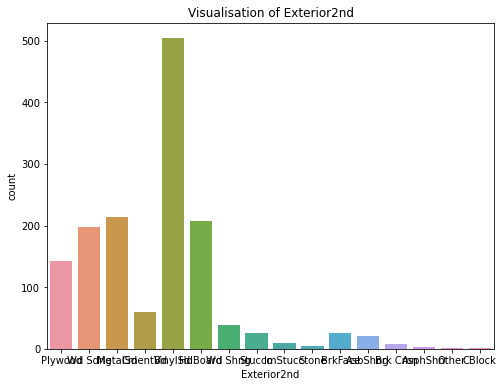

Attribute name:  MasVnrType
Null values:
 8
Unique values:
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


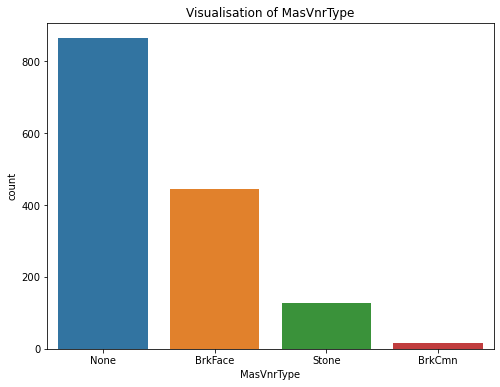

Attribute name:  MasVnrArea
Null values:
 8
Unique values:
 0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
768.0      1
479.0      1
263.0      1
459.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64


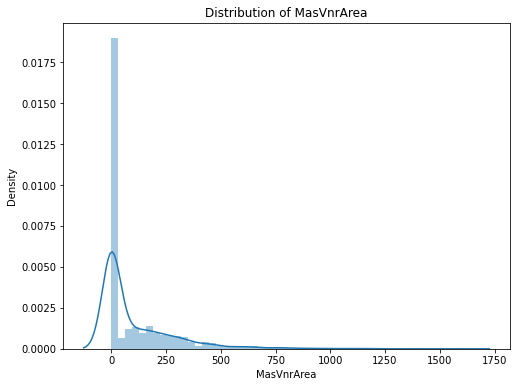

Attribute name:  ExterQual
Null values:
 0
Unique values:
 TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


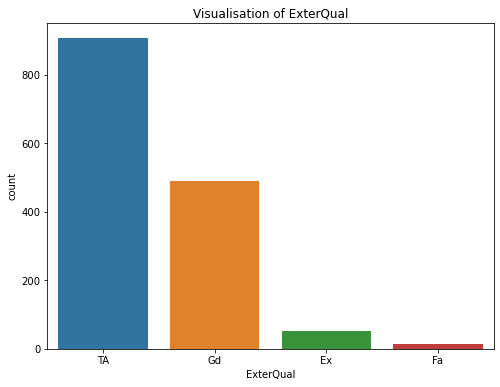

Attribute name:  ExterCond
Null values:
 0
Unique values:
 TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


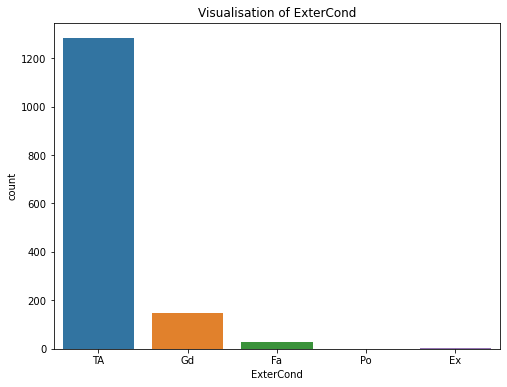

Attribute name:  Foundation
Null values:
 0
Unique values:
 PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


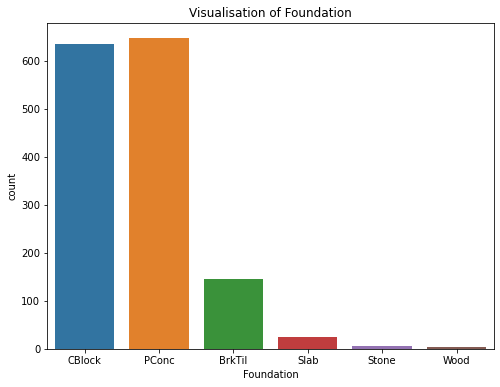

Attribute name:  BsmtQual
Null values:
 37
Unique values:
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


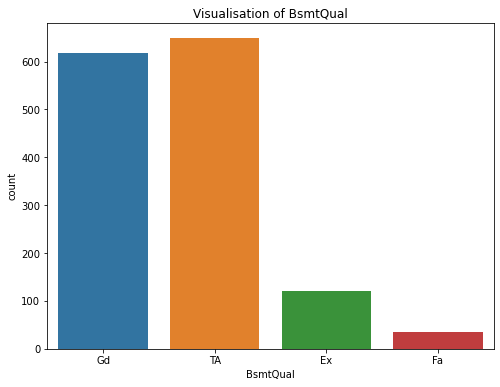

Attribute name:  BsmtCond
Null values:
 37
Unique values:
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


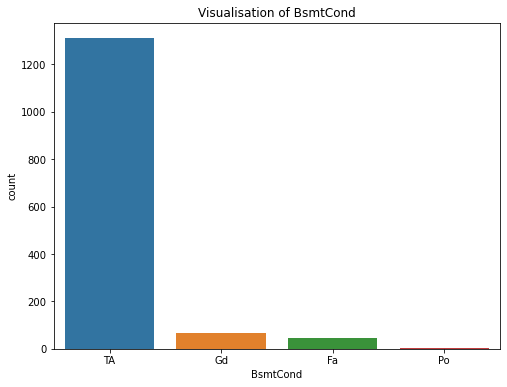

Attribute name:  BsmtExposure
Null values:
 38
Unique values:
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


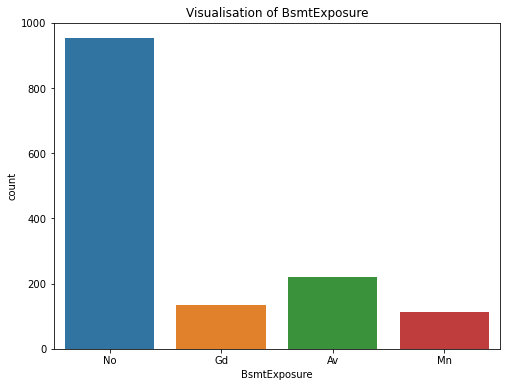

Attribute name:  BsmtFinType1
Null values:
 37
Unique values:
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


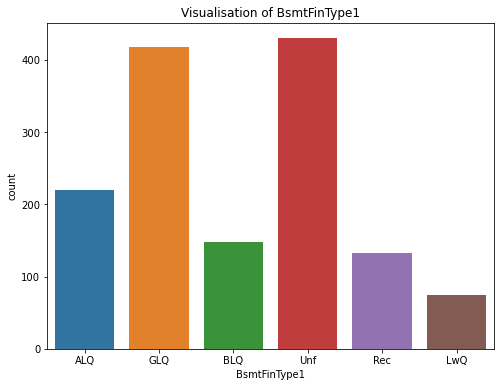

Attribute name:  BsmtFinSF1
Null values:
 0
Unique values:
 0      467
24      12
16       9
936      5
662      5
      ... 
684      1
273      1
679      1
678      1
639      1
Name: BsmtFinSF1, Length: 637, dtype: int64


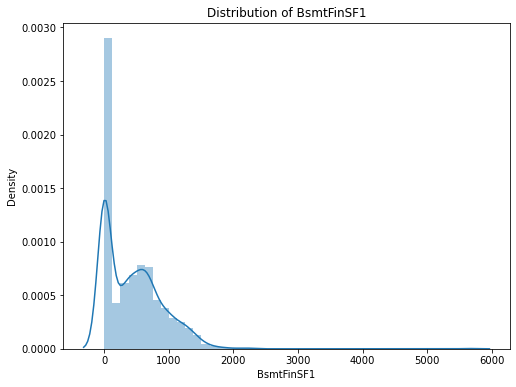

Attribute name:  BsmtFinType2
Null values:
 38
Unique values:
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


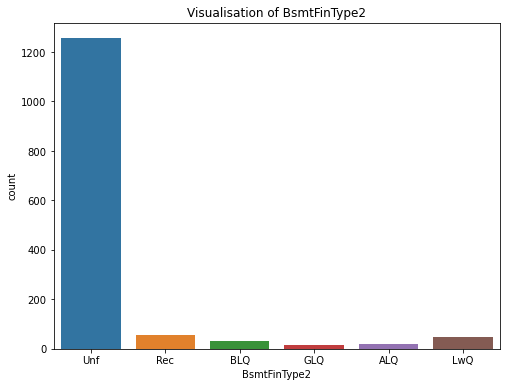

Attribute name:  BsmtFinSF2
Null values:
 0
Unique values:
 0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64


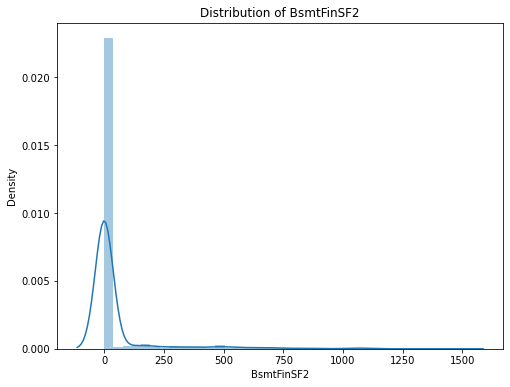

Attribute name:  BsmtUnfSF
Null values:
 0
Unique values:
 0       118
728       9
384       8
572       7
600       7
       ... 
550       1
549       1
548       1
545       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64


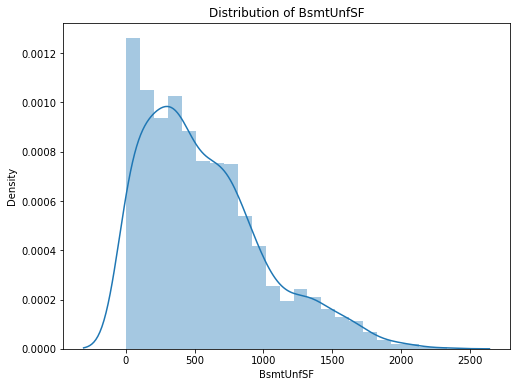

Attribute name:  TotalBsmtSF
Null values:
 0
Unique values:
 0       37
864     35
672     17
912     15
1040    14
        ..
736      1
1205     1
738      1
1203     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64


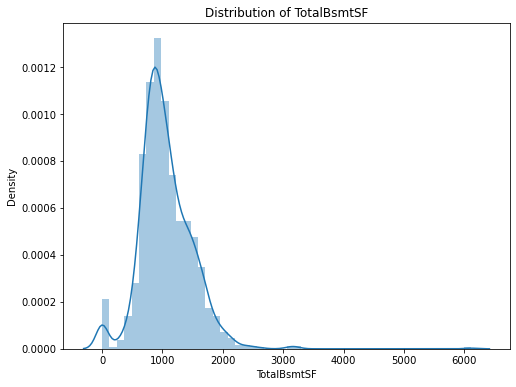

Attribute name:  Heating
Null values:
 0
Unique values:
 GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


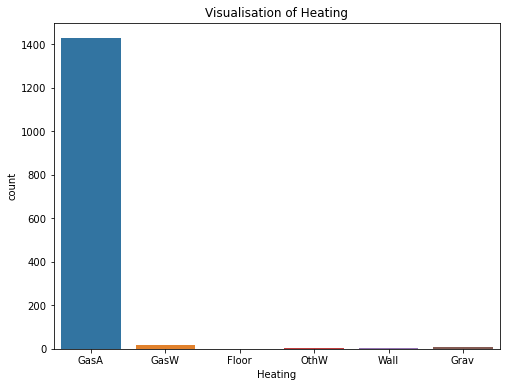

Attribute name:  HeatingQC
Null values:
 0
Unique values:
 Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


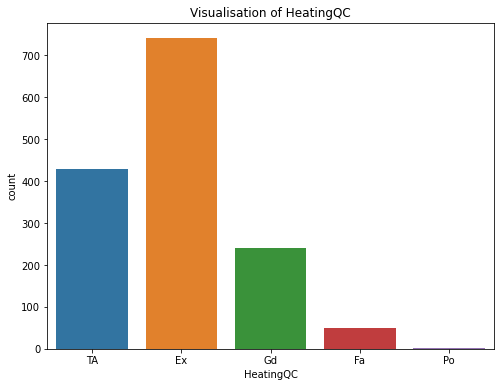

Attribute name:  CentralAir
Null values:
 0
Unique values:
 Y    1365
N      95
Name: CentralAir, dtype: int64


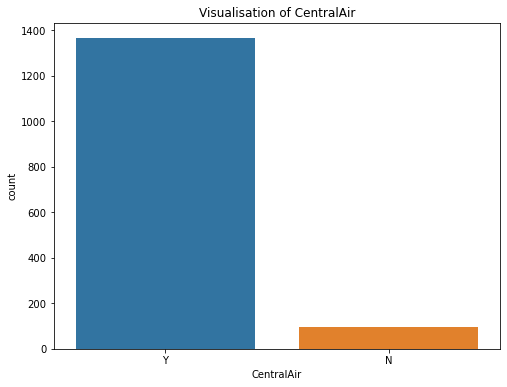

Attribute name:  Electrical
Null values:
 1
Unique values:
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


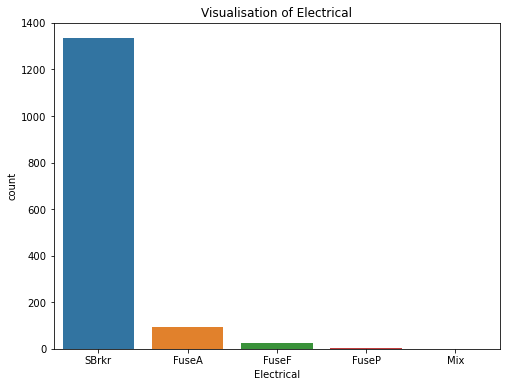

Attribute name:  1stFlrSF
Null values:
 0
Unique values:
 864     25
1040    16
912     14
848     12
894     12
        ..
1061     1
1058     1
1051     1
1047     1
2046     1
Name: 1stFlrSF, Length: 753, dtype: int64


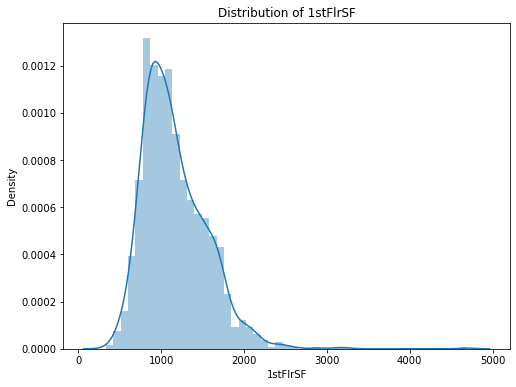

Attribute name:  2ndFlrSF
Null values:
 0
Unique values:
 0       829
728      10
504       9
672       8
546       8
       ... 
812       1
811       1
473       1
475       1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64


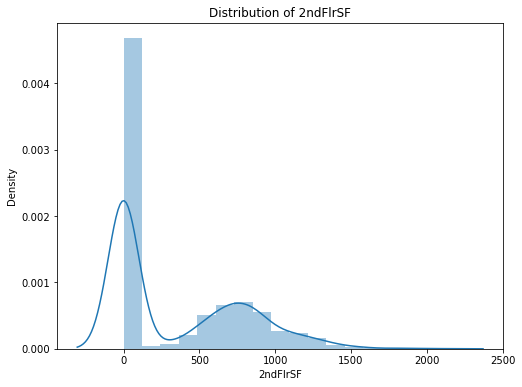

Attribute name:  LowQualFinSF
Null values:
 0
Unique values:
 0      1434
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479       1
473       1
420       1
397       1
390       1
53        1
384       1
371       1
234       1
232       1
205       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64


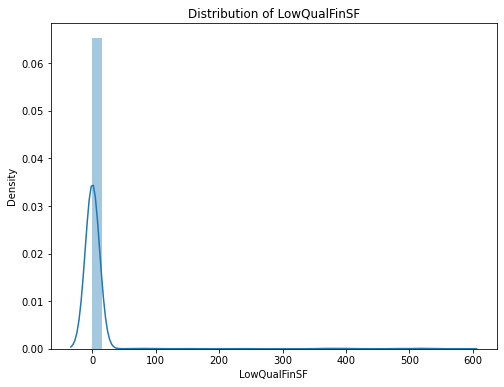

Attribute name:  GrLivArea
Null values:
 0
Unique values:
 864     22
1040    14
894     11
1456    10
848     10
        ..
752      1
1347     1
1346     1
754      1
2054     1
Name: GrLivArea, Length: 861, dtype: int64


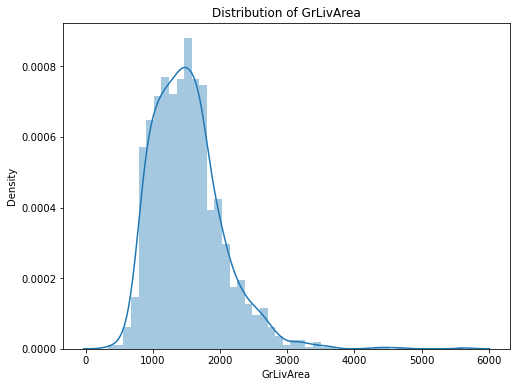

Attribute name:  BsmtFullBath
Null values:
 0
Unique values:
 0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


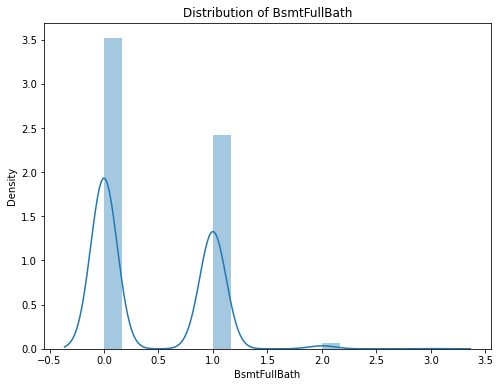

Attribute name:  BsmtHalfBath
Null values:
 0
Unique values:
 0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


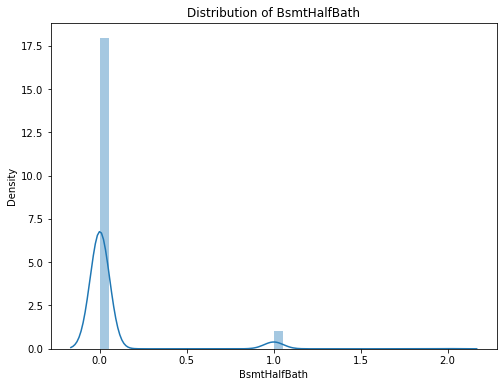

Attribute name:  FullBath
Null values:
 0
Unique values:
 2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


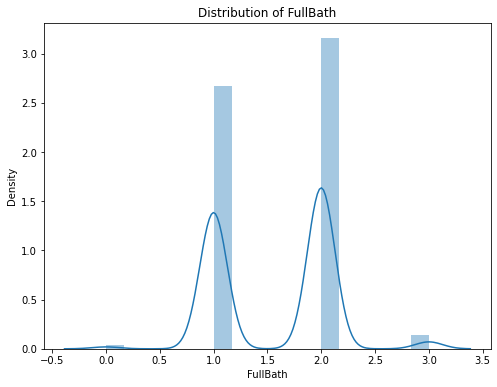

Attribute name:  HalfBath
Null values:
 0
Unique values:
 0    913
1    535
2     12
Name: HalfBath, dtype: int64


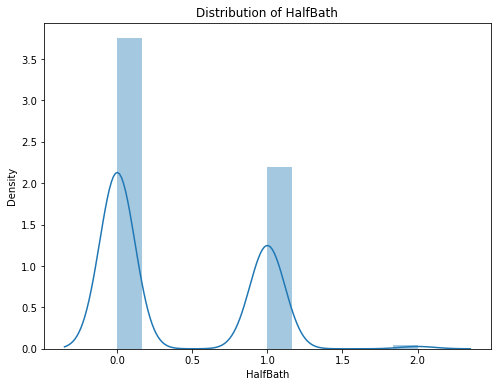

Attribute name:  BedroomAbvGr
Null values:
 0
Unique values:
 3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


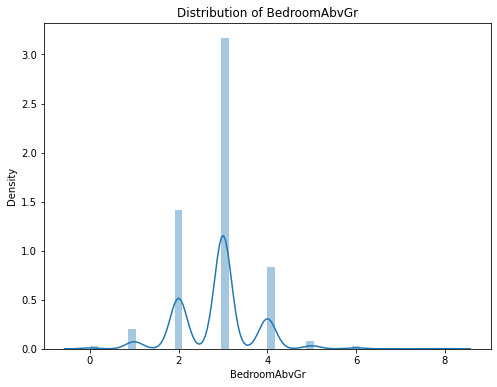

Attribute name:  KitchenAbvGr
Null values:
 0
Unique values:
 1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


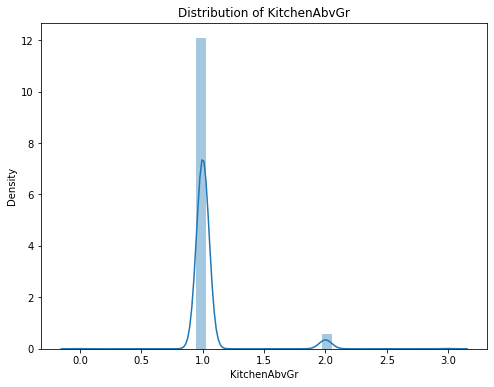

Attribute name:  KitchenQual
Null values:
 0
Unique values:
 TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


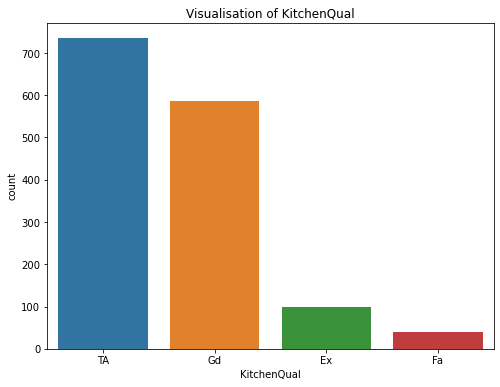

Attribute name:  TotRmsAbvGrd
Null values:
 0
Unique values:
 6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


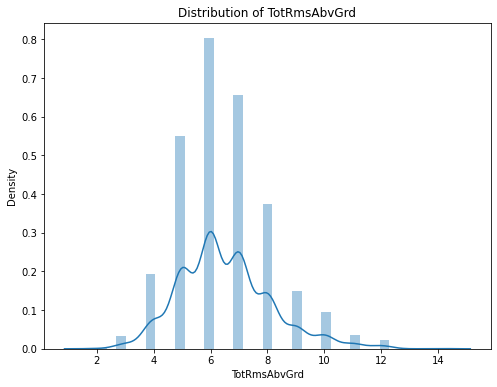

Attribute name:  Functional
Null values:
 0
Unique values:
 Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


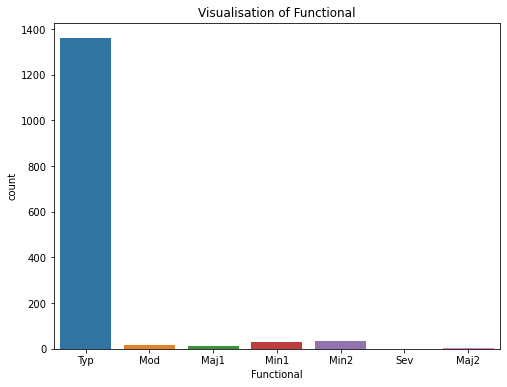

Attribute name:  Fireplaces
Null values:
 0
Unique values:
 0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


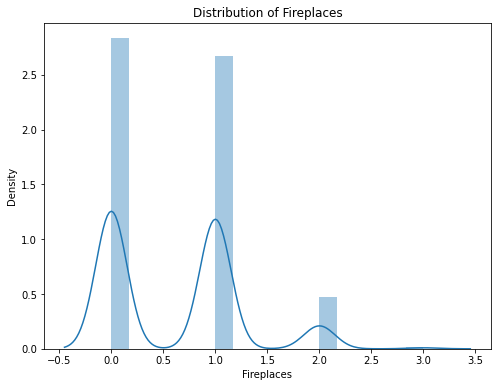

Attribute name:  FireplaceQu
Null values:
 690
Unique values:
 Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


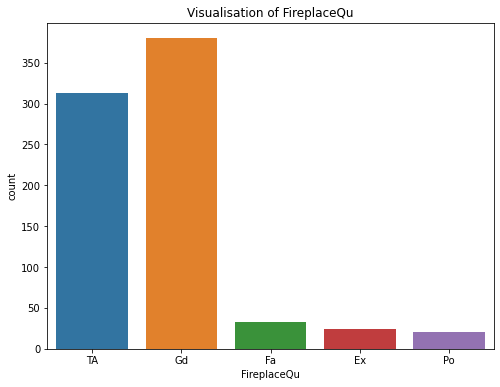

Attribute name:  GarageType
Null values:
 81
Unique values:
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


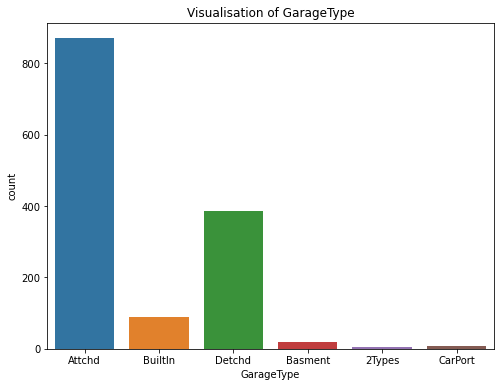

Attribute name:  GarageYrBlt
Null values:
 81
Unique values:
 2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1933.0     1
1900.0     1
1927.0     1
1908.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64


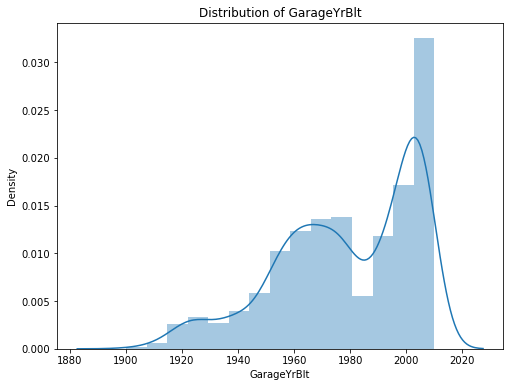

Attribute name:  GarageFinish
Null values:
 81
Unique values:
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64


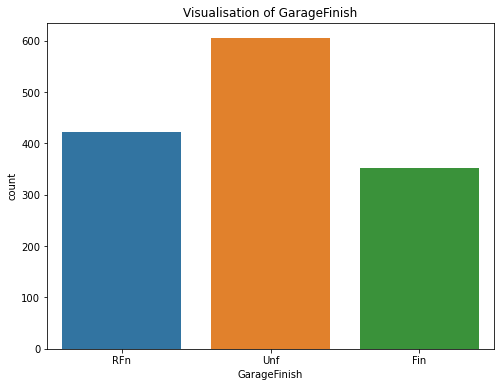

Attribute name:  GarageCars
Null values:
 0
Unique values:
 2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


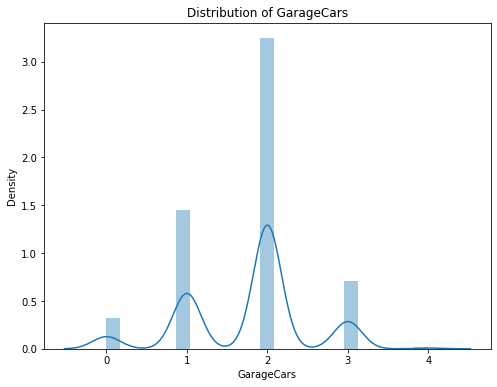

Attribute name:  GarageArea
Null values:
 0
Unique values:
 0       81
440     49
576     47
240     38
484     34
        ..
671      1
342      1
673      1
675      1
1418     1
Name: GarageArea, Length: 441, dtype: int64


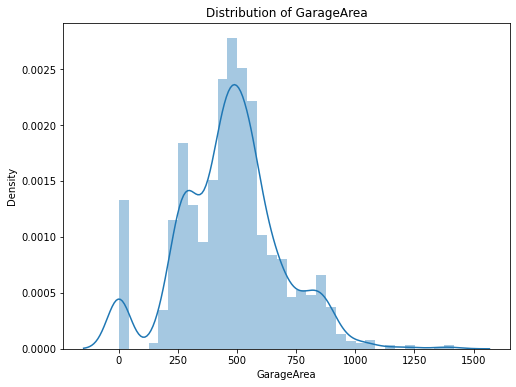

Attribute name:  GarageQual
Null values:
 81
Unique values:
 TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


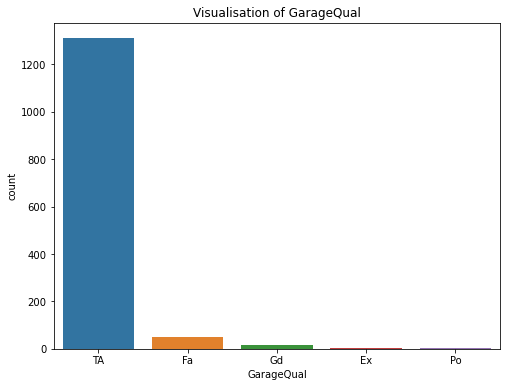

Attribute name:  GarageCond
Null values:
 81
Unique values:
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


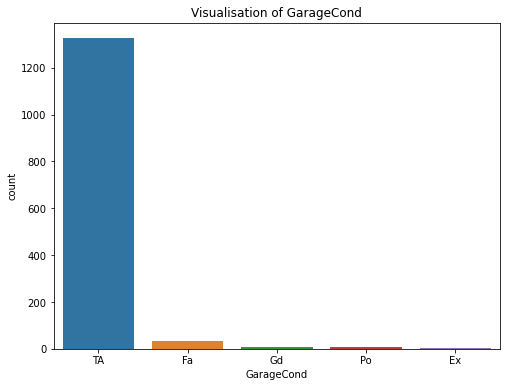

Attribute name:  PavedDrive
Null values:
 0
Unique values:
 Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


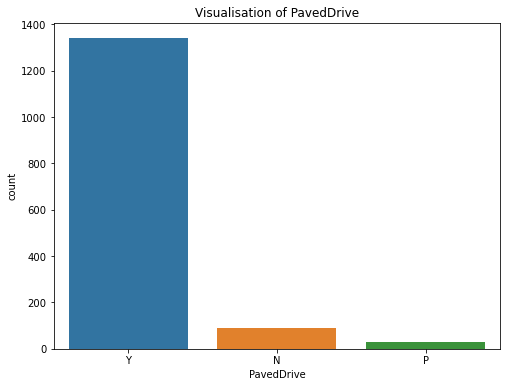

Attribute name:  WoodDeckSF
Null values:
 0
Unique values:
 0      761
192     38
100     36
144     33
120     31
      ... 
103      1
269      1
98       1
97       1
857      1
Name: WoodDeckSF, Length: 274, dtype: int64


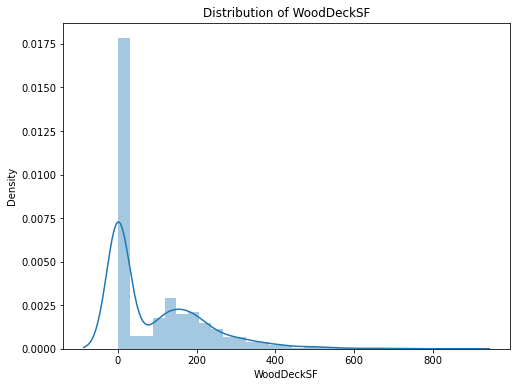

Attribute name:  OpenPorchSF
Null values:
 0
Unique values:
 0      656
36      29
48      22
20      21
45      19
      ... 
141      1
137      1
135      1
134      1
547      1
Name: OpenPorchSF, Length: 202, dtype: int64


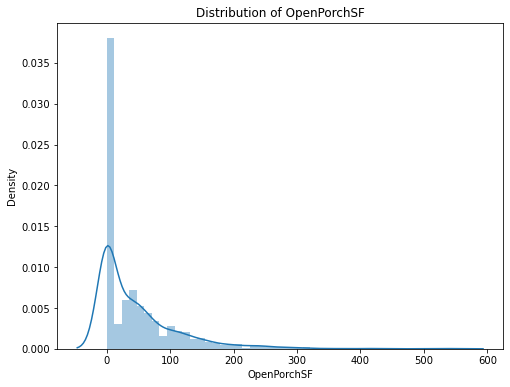

Attribute name:  EnclosedPorch
Null values:
 0
Unique values:
 0      1252
112      15
96        6
120       5
192       5
       ... 
170       1
169       1
67        1
68        1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64


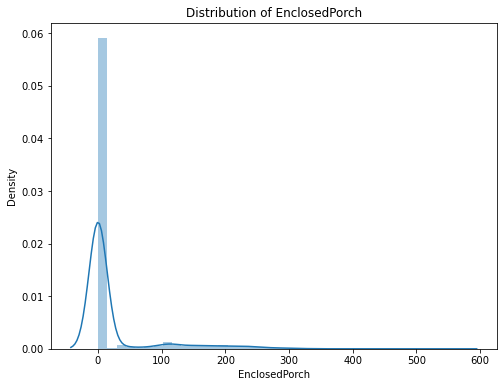

Attribute name:  3SsnPorch
Null values:
 0
Unique values:
 0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64


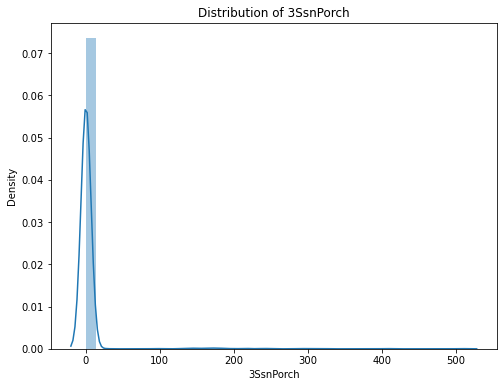

Attribute name:  ScreenPorch
Null values:
 0
Unique values:
 0      1344
192       6
120       5
224       5
180       4
       ... 
175       1
178       1
40        1
185       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64


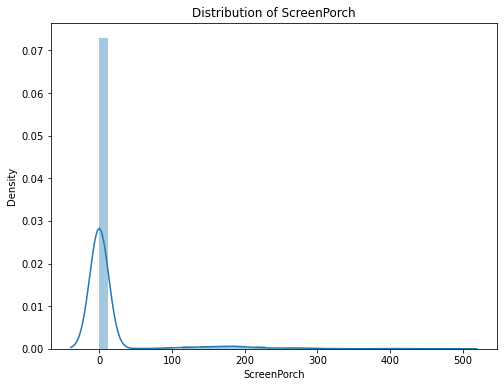

Attribute name:  PoolArea
Null values:
 0
Unique values:
 0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64


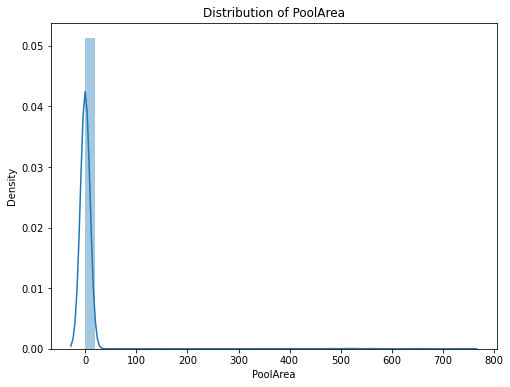

Attribute name:  MiscVal
Null values:
 0
Unique values:
 0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64


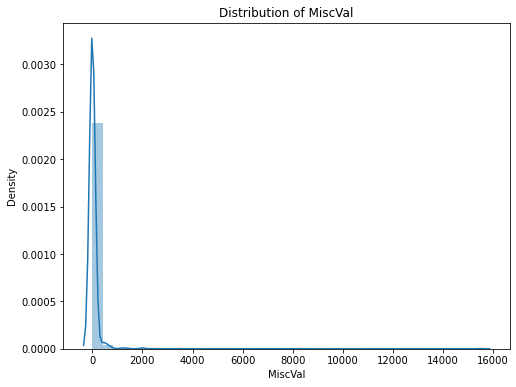

Attribute name:  MoSold
Null values:
 0
Unique values:
 6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


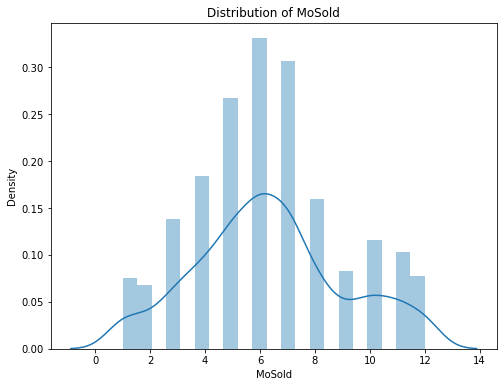

Attribute name:  YrSold
Null values:
 0
Unique values:
 2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


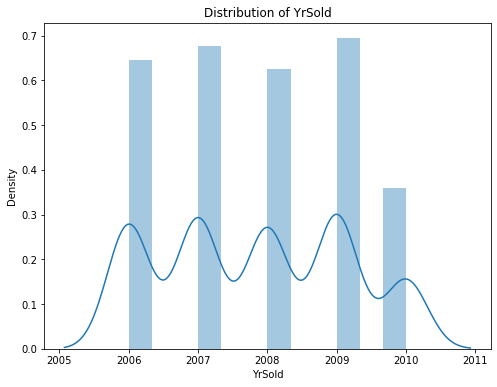

Attribute name:  SaleType
Null values:
 0
Unique values:
 WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


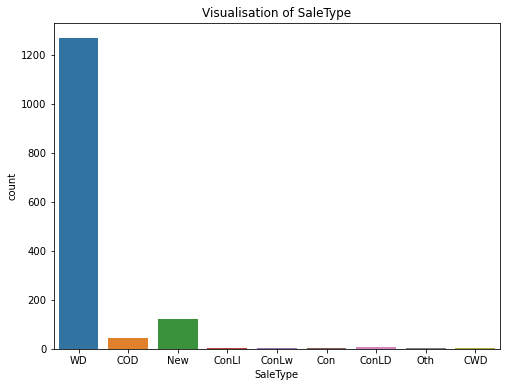

Attribute name:  SaleCondition
Null values:
 0
Unique values:
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


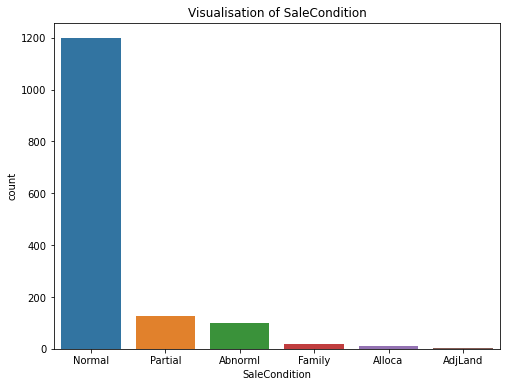

Attribute name:  SalePrice
Null values:
 292
Unique values:
 140000.0    18
135000.0    16
155000.0    12
160000.0    11
139000.0    11
            ..
259000.0     1
286000.0     1
138887.0     1
110500.0     1
269500.0     1
Name: SalePrice, Length: 581, dtype: int64


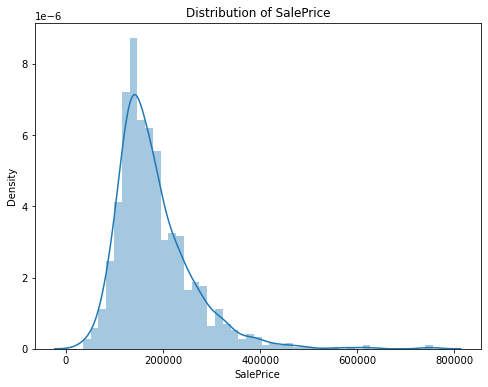

In [18]:
col = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

#looping over the columns
for i in col:
    #calling the categorical and numerical function based on the condition applied
    if df[i].dtype == 'object':
        cat_details(i)
    else:
        num_details(i)
    

 ## Observations:

 1. There are highest number of 1 story old & NEWER ALL STYLES of house in sale.
 2. Huge number of houses in low residential density are in the sales.
 3. LotFrontage: There are 259 null values and average of 70 and maximum of 313, we need to check if there are outliers. 
 4. More than 95% of houses have paved type of street. No null values.
 5. Most of the houses listed are having regular shape of property. It shows that max percent of houses have level of near flat. and each house listed have all public utlilties available comprise of nearly 98%.
 6. As we know not many houses get corner, we see 80% of inside lot, and rest of all other lots shares for 20%.
 7. 15-20% of houses listed have neighborhood to North ames which is the highest. And Most of houses listed are suitable for 1 families detached and 1 story buildings.  
 8. 90% of houses listed have an overall quality and material of average and above. We can look for outliers in the attribute. 93% of listed houses have above average overall condition.
 9. 70% of houses have gable type of roof style and 90% uses composite Shingle which is based on the country wide followed trend.
 10. Masonry veneer is not used by 75% of dwellings listed hence the value Masonry veneer area is zero.
 11. 75% of houses listed has average/typical exterior quality materials and condition and 90% of houses foundations are built with poured concrete or cinder blocks method.
 12. More than 90% houses have above inches of basement height with good quality but with no exposure.
 13. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF 2ndFlrSF, LowQualFinSF,BsmtFullBath,BsmtHalfBath,HalfBath consist of 90% of zero records, null values. 
 14. Most of houses(nearly 90%) are having features like central air conditioning, and excellent Gas forced warm air furnace heating facility.
 15. Most of dwellings have 1 kitchen with kitchen quality above average.
 16. On an average  6 or 7 number of rooms in listed houses are with above grade. with 90% typical Home functionality.
 17. Most of dwellings have good fireplace quality. The house has attached type of garage with good finished interior with average 2 car space in garage. 
 18. WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal have 90% of zero as input.
 19. The Type of sale proceeded is Conventional Warranty Deed type with Normal Sale condition.
 20. The price of dwelling is distributed around the mean of 180K with maximum price being 755K.
 


In [19]:
# let us check for all the columns having null values

Null_val = df.isnull().sum()
Null_val = Null_val[Null_val>0]

Null_val.to_frame

<bound method Series.to_frame of LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64>

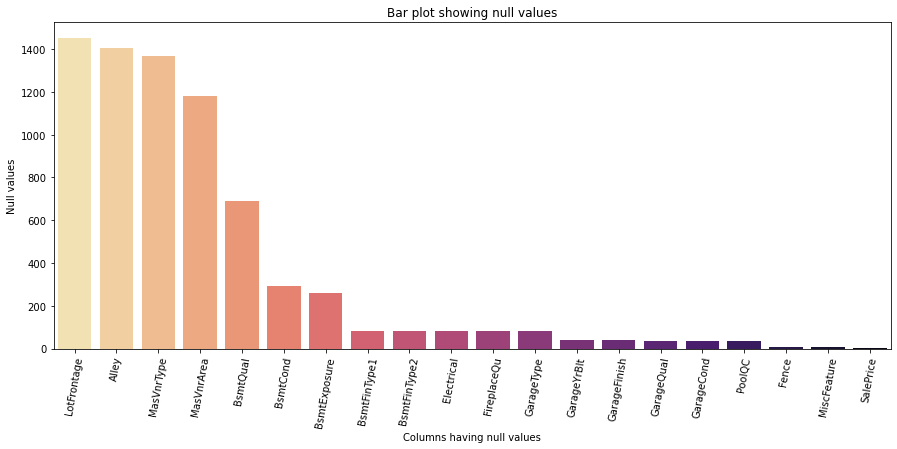

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x = Null_val.index, y=sorted(Null_val.values, reverse=True), palette='magma_r')
plt.xticks(rotation = 80)
plt.title('Bar plot showing null values')
plt.xlabel('Columns having null values')
plt.ylabel('Null values')
plt.show()

#### We have visualized the attributes vs null values by sorting in ascending order in order to have clear picture of columns to be handled for missing values.

## Plotting the graphs for different attributes based on the type of data

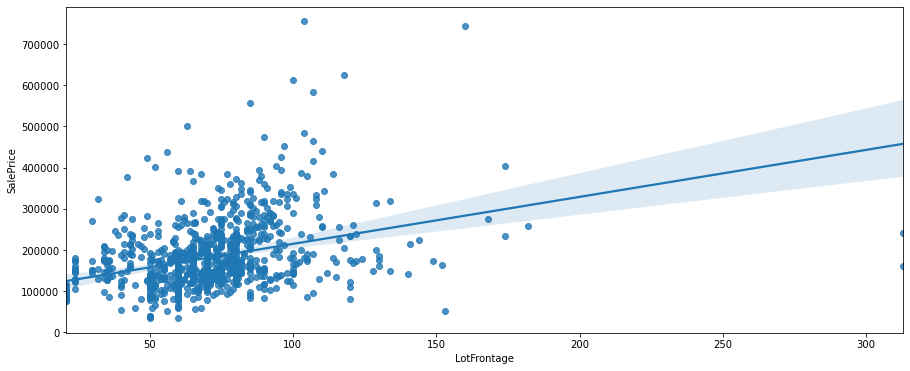

In [21]:
plt.figure(figsize=(15,6)) 
sns.regplot(x=df['LotFrontage'], y = df['SalePrice'])
 
plt.show()

### Observation:
Sale Price of house is linearly moving with Linear feet of street connected to property upto 120.

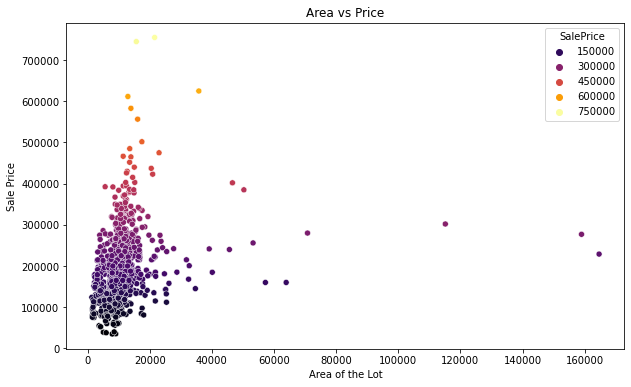

In [22]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(x='LotArea', y = 'SalePrice',data=df,hue='SalePrice',palette='inferno')
plt.title('Area vs Price')
plt.xlabel('Area of the Lot')
plt.ylabel('Sale Price')
plt.show()

### Observation:
House prices have been raising exponentially wrt lot Area as seen in figure. There are some outliers with > 150000 area, need to treat them

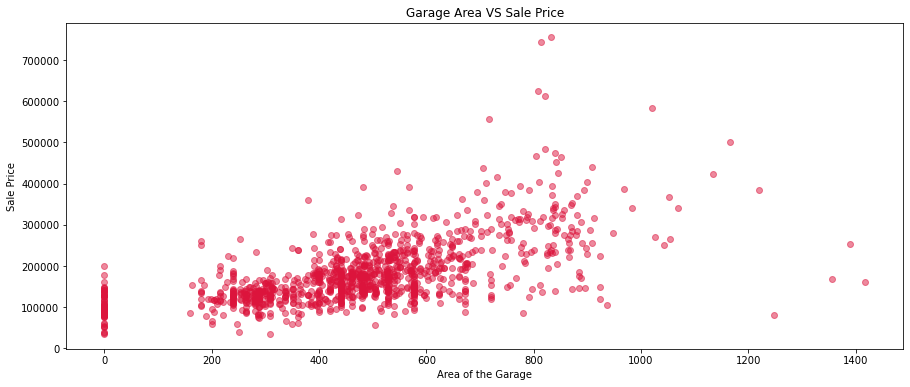

In [23]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'GarageArea', y = 'SalePrice', data = df, color='crimson', alpha=0.5)
plt.title('Garage Area VS Sale Price')
plt.xlabel('Area of the Garage')
plt.ylabel('Sale Price')
plt.show()

### Observation:
There are values with zero records in the attribute, and some outliers in the dataset.

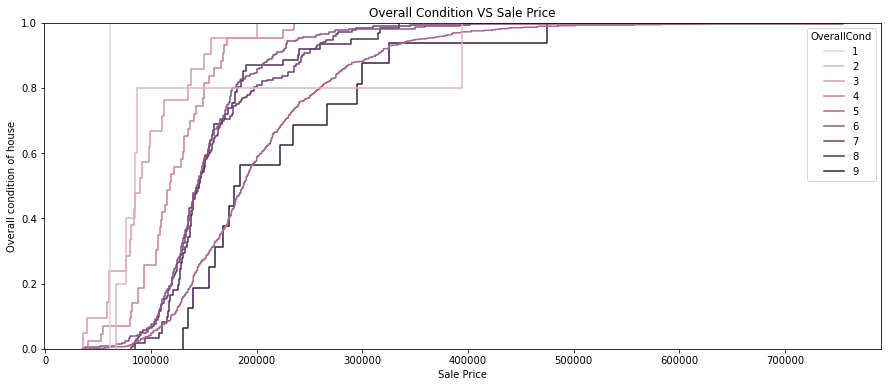

In [24]:
plt.figure(figsize = ((15, 6)))
sns.ecdfplot( hue= 'OverallCond', x = 'SalePrice', data = df)
plt.title('Overall Condition VS Sale Price')
plt.ylabel('Overall condition of house')
plt.xlabel('Sale Price')
plt.show()

### Observation:
The overall conditions having score more than 6 are having continous distribution curves which mean that most of the house have above average overall condition.

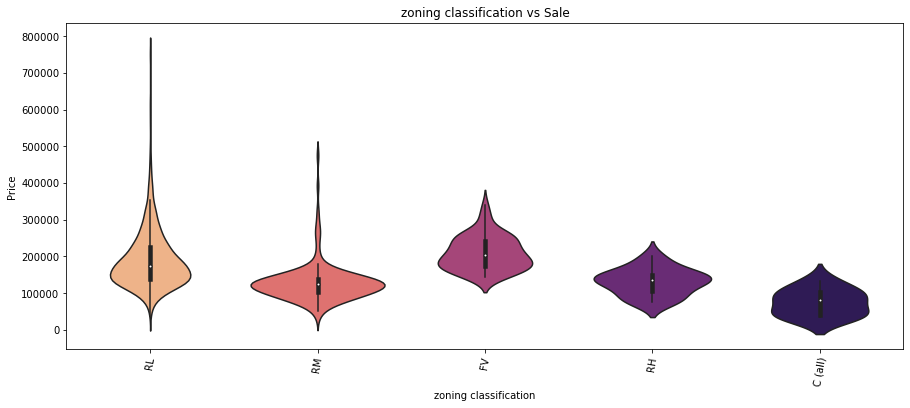

In [25]:
plt.figure(figsize=(15,6))
sns.violinplot(y ='SalePrice',x='MSZoning',data=df, palette='magma_r')
plt.xticks(rotation = 80)
plt.title('zoning classification vs Sale')
plt.ylabel('Price')
plt.xlabel('zoning classification')
plt.show()

### Observation:
928 houses are in Residential Low Density which have the highest price variation.

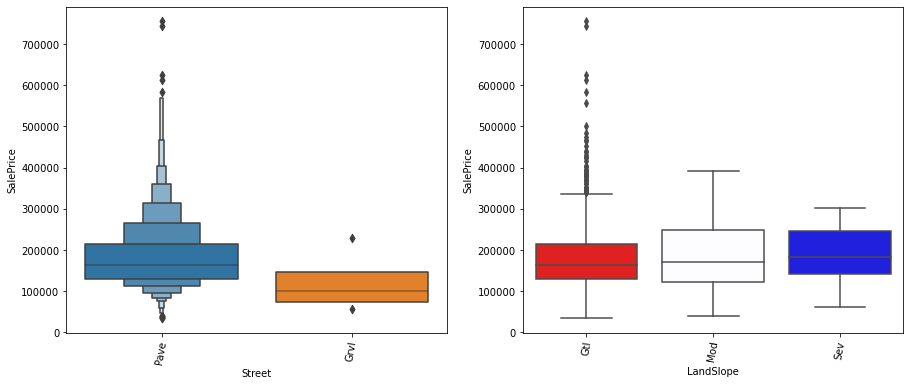

In [26]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['Street'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['LandSlope'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observation:
There are 1454 having Paved type where as only 4 are Gravel.

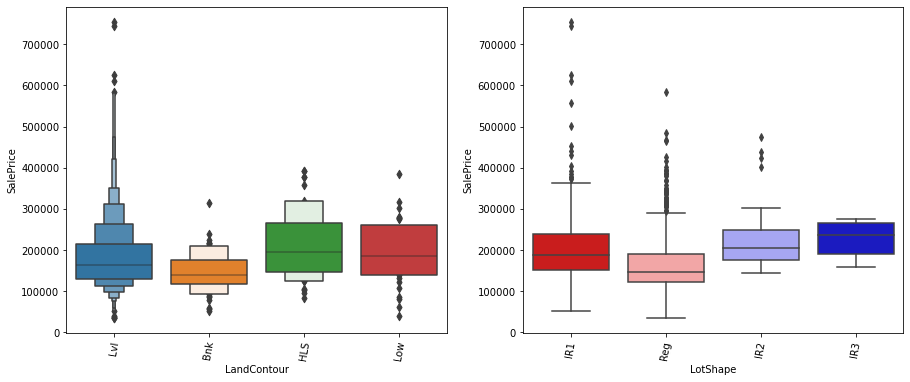

In [27]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['LandContour'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['LotShape'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observation:
Most of houses having levelled land contour and having slight irregularity have wide range of sale price.

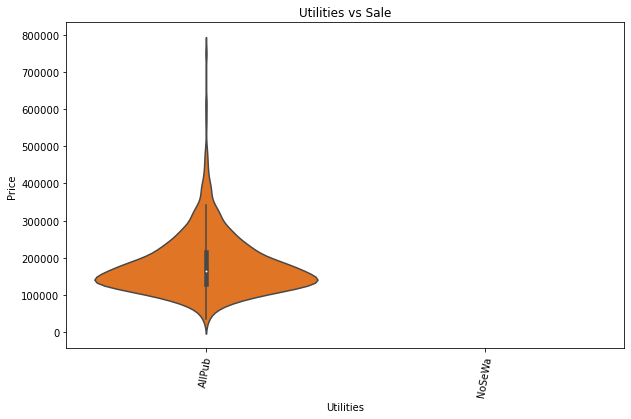

In [28]:
plt.figure(figsize=(10,6))
sns.violinplot(y ='SalePrice',x='Utilities',data=df, palette='gist_ncar_r')
plt.xticks(rotation = 80)
plt.title('Utilities vs Sale')
plt.ylabel('Price')
plt.xlabel('Utilities')
plt.show()

### Observation:
All the houses listed do include all public Utilities.

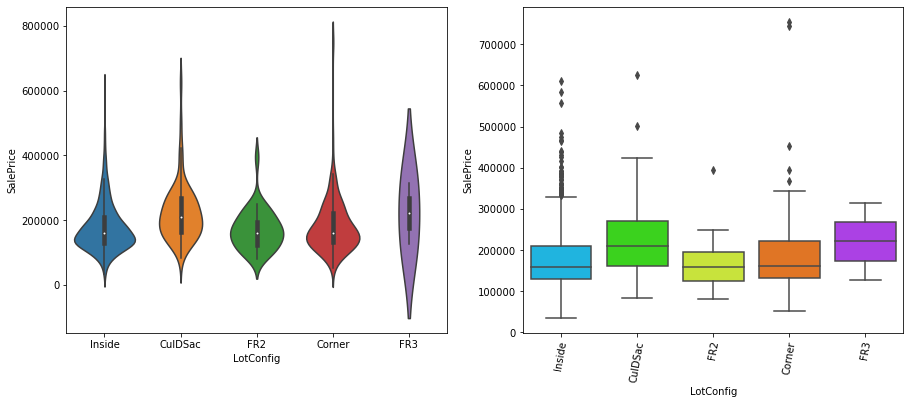

In [29]:
plt.figure(figsize=(15,6)) 
ax = plt.subplot(1,2,1) 
sns.violinplot(x=df['LotConfig'], y = df['SalePrice']) 
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['LotConfig'], y = df['SalePrice'],palette='gist_ncar') 
plt.xticks(rotation=80)
plt.show()

### Observation:
Houses in corner are having most variable range of prices and Frontage 3 sides are having mean around 25000 with less variance.

There are outliers present in the dataset and  842 houses with LotConfig are Inside.

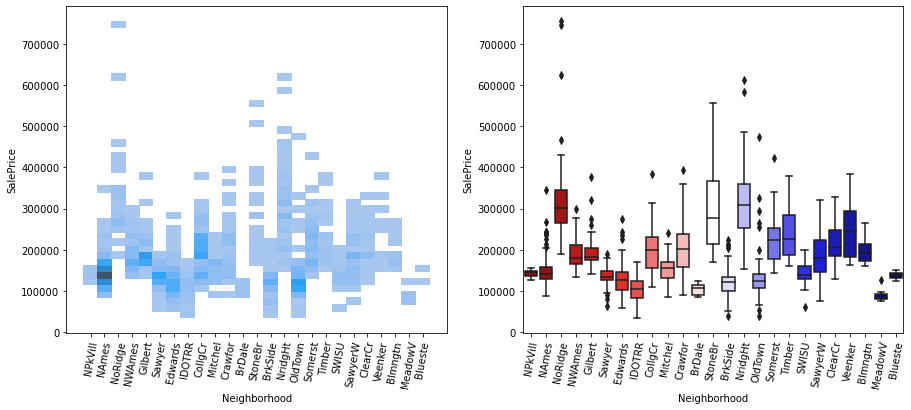

In [30]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.histplot(x=df['Neighborhood'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['Neighborhood'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observation:
Houses with north ridge neighborhood are highest price listed houses. All the neighbors are having some outliers in the dataset need to be treated.

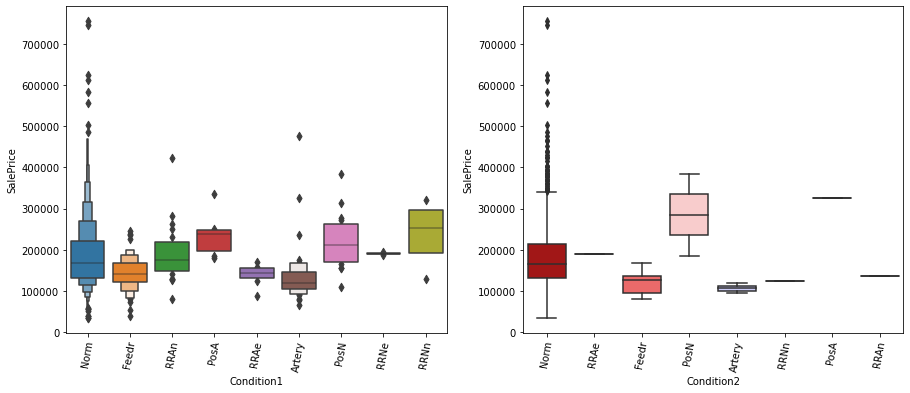

In [31]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['Condition1'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['Condition2'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observations:
Most of houses have normal condition

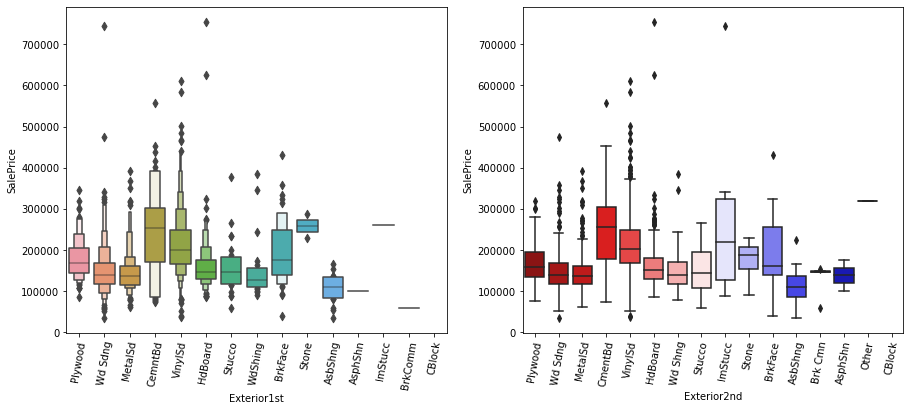

In [32]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['Exterior1st'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['Exterior2nd'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observations:
VinylSd is highest used material in Exteriors. 

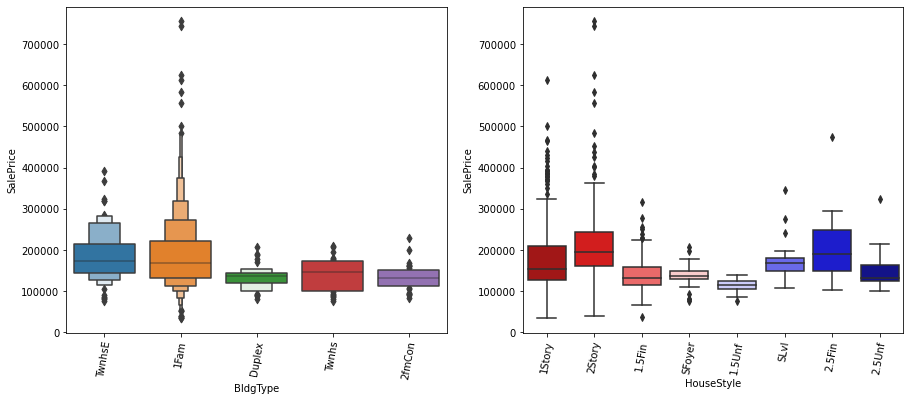

In [33]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['BldgType'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['HouseStyle'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


### Observations:
1Fam houses are having highest price range.

578 houses have 1Story and value raning between 100K to 200K, 2Story are the highest priced houses.

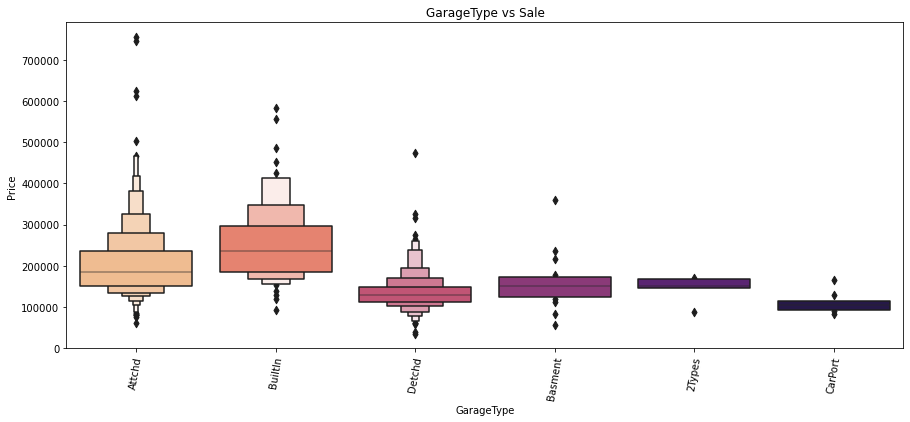

In [34]:
plt.figure(figsize=(15,6))
sns.boxenplot(y ='SalePrice',x='GarageType',data=df, palette='magma_r')
plt.xticks(rotation = 80)
plt.title('GarageType vs Sale')
plt.ylabel('Price')
plt.xlabel('GarageType')

plt.show()

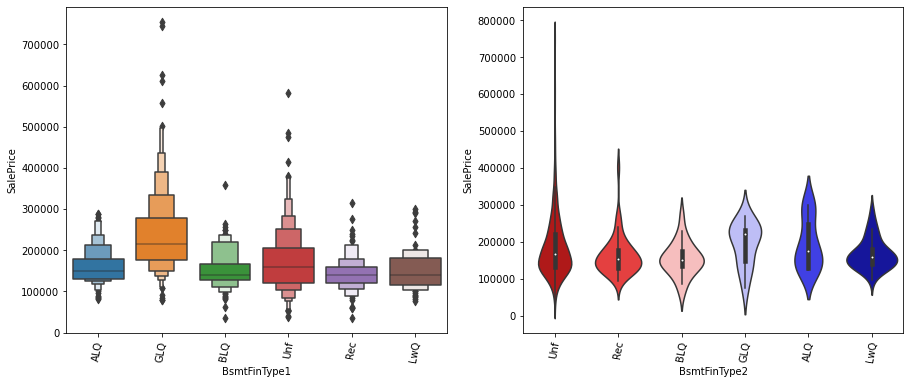

In [35]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['BsmtFinType1'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.violinplot(x=df['BsmtFinType2'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


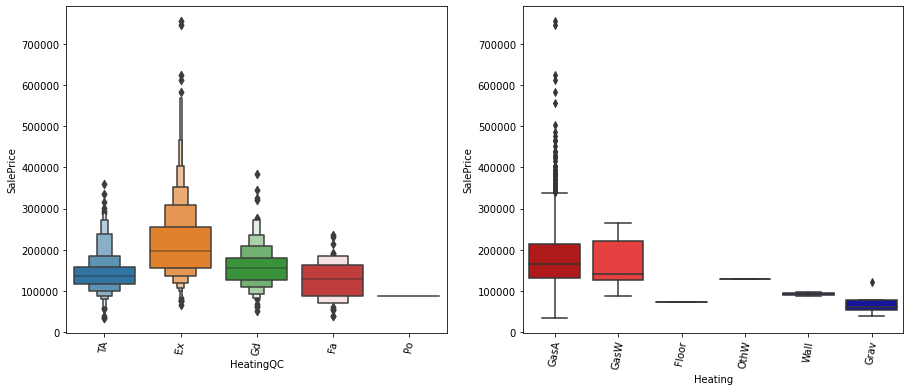

In [36]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['HeatingQC'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['Heating'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


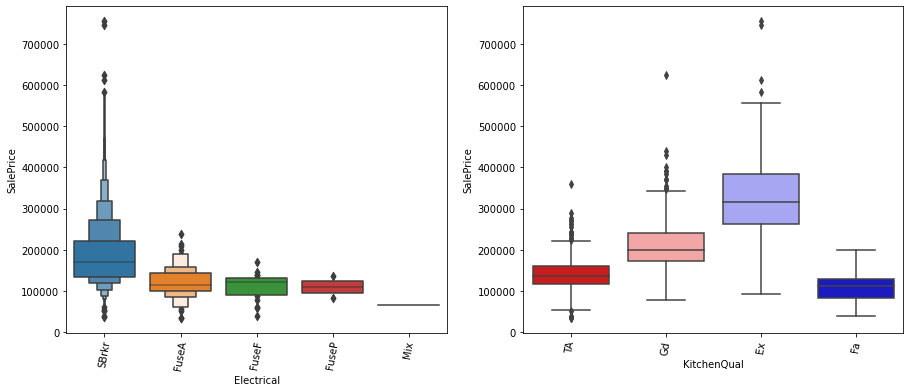

In [37]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1) 
sns.boxenplot(x=df['Electrical'], y = df['SalePrice']) 
plt.xticks(rotation=80)
ax = plt.subplot(1,2,2) 
sns.boxplot(x=df['KitchenQual'], y = df['SalePrice'],palette='seismic_r') 
plt.xticks(rotation=80)
plt.show()


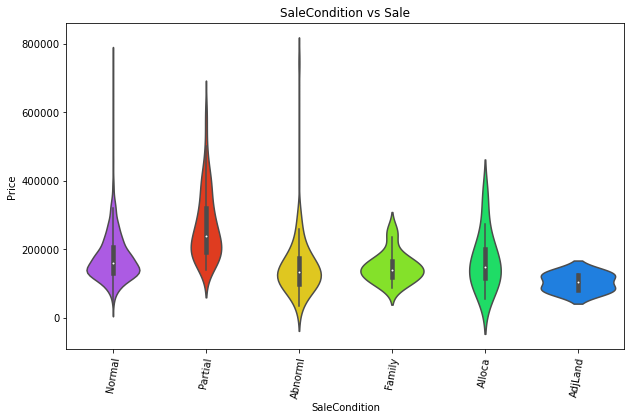

In [38]:
plt.figure(figsize=(10,6))
sns.violinplot(y ='SalePrice',x='SaleCondition',data=df, palette='gist_ncar_r')
plt.xticks(rotation = 80)
plt.title('SaleCondition vs Sale')
plt.ylabel('Price')
plt.xlabel('SaleCondition')
plt.show()

## Observations:

1. 691 of houses are having attached garage have large mean of price range.
2. Basements with Good Living Quarters are having high price list and most of basements are unfinished.
3. High ranges of house are having excellent heating quality and condition, and most of them are Gas forced warm air furnace.
4. Normal sale condition seem to have high range price and  abnormal sale condition seems having outliers.

### Let us plot histogram for all the numerical variables and check the distribution of each attribute w.r.t Sales price

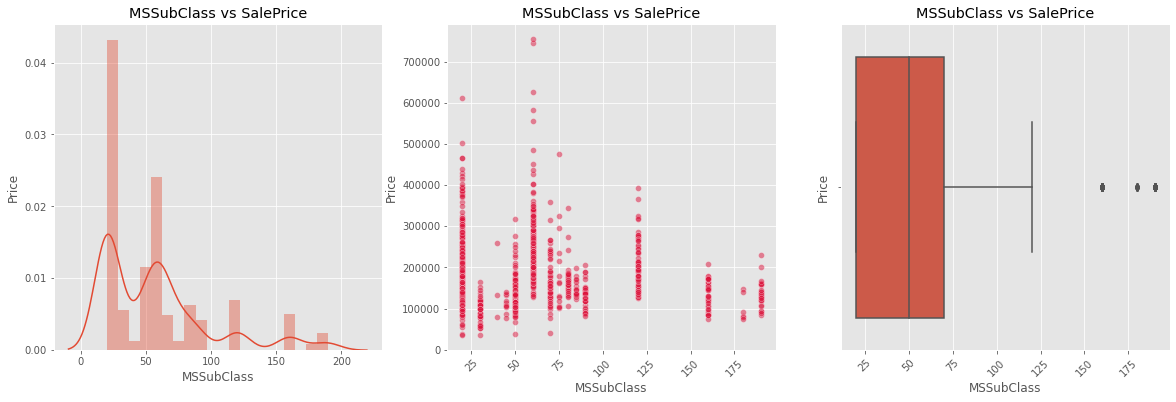

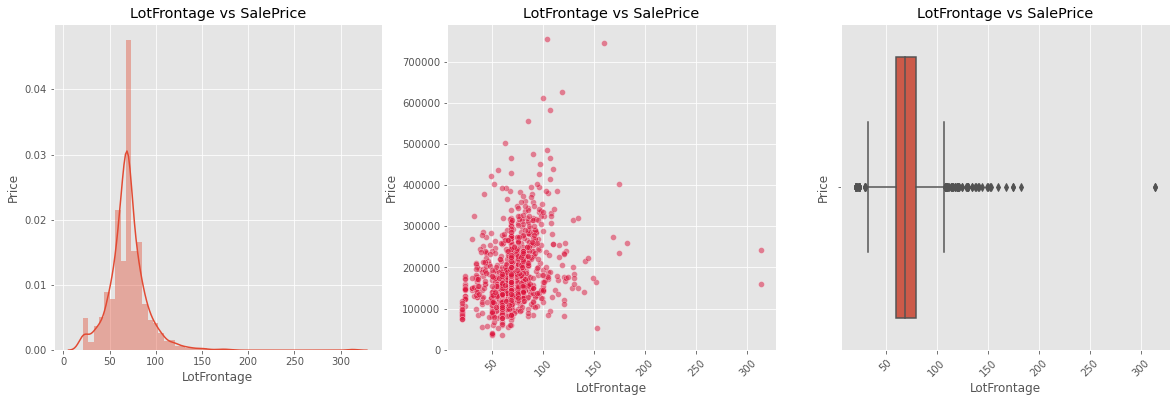

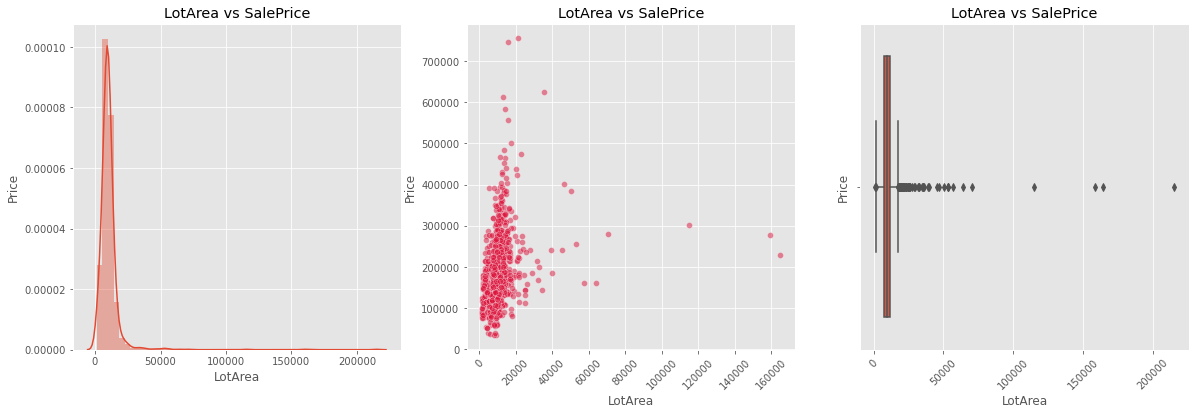

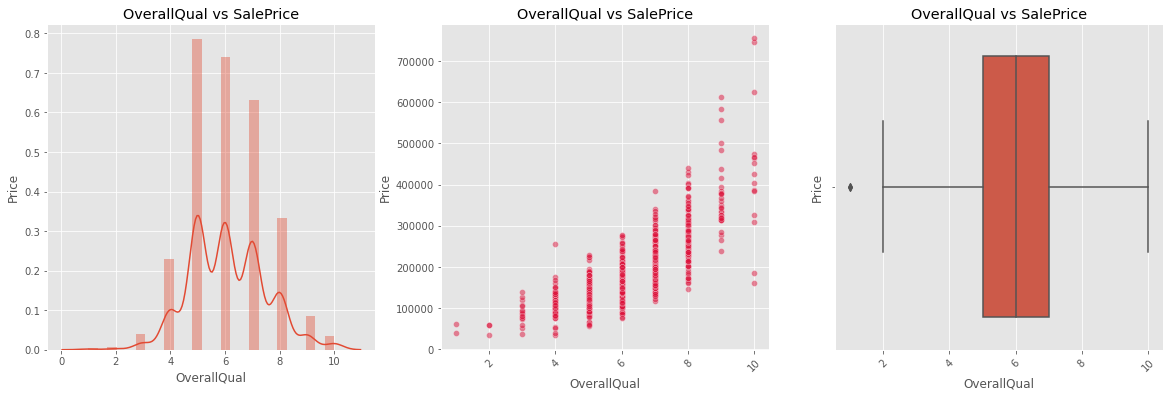

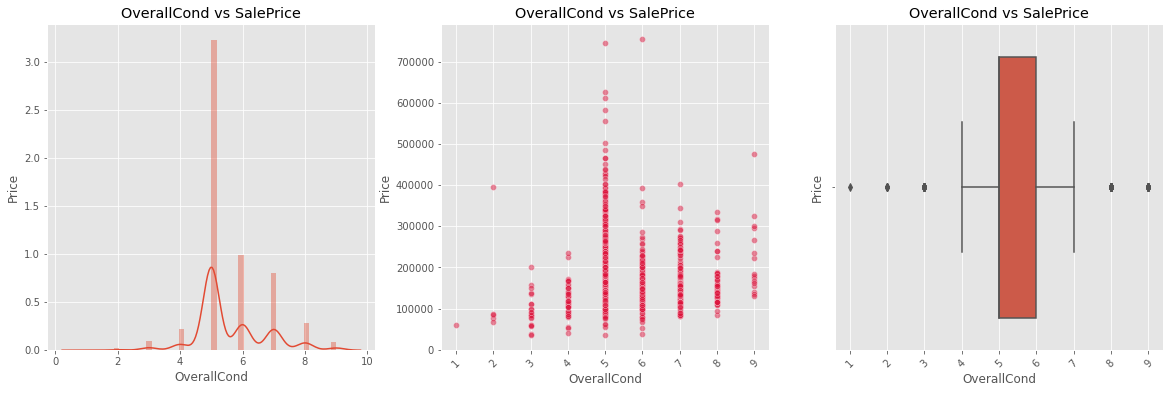

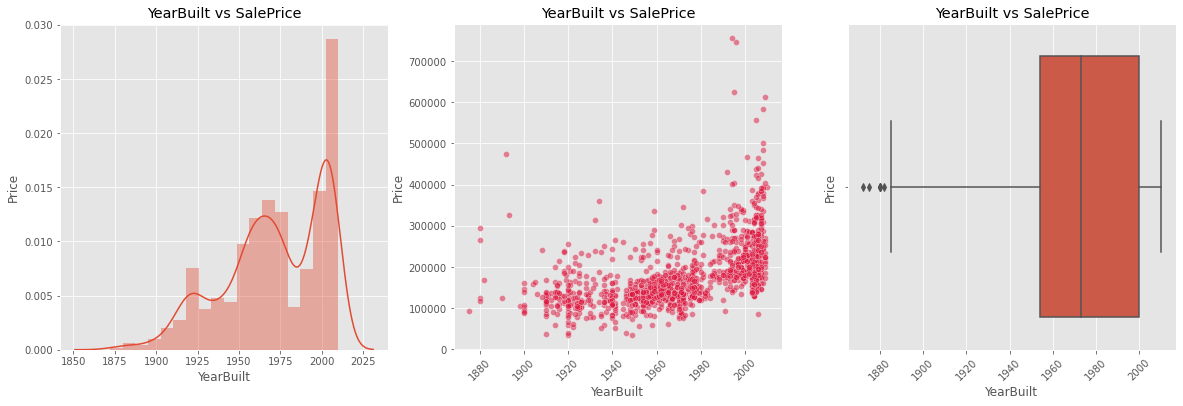

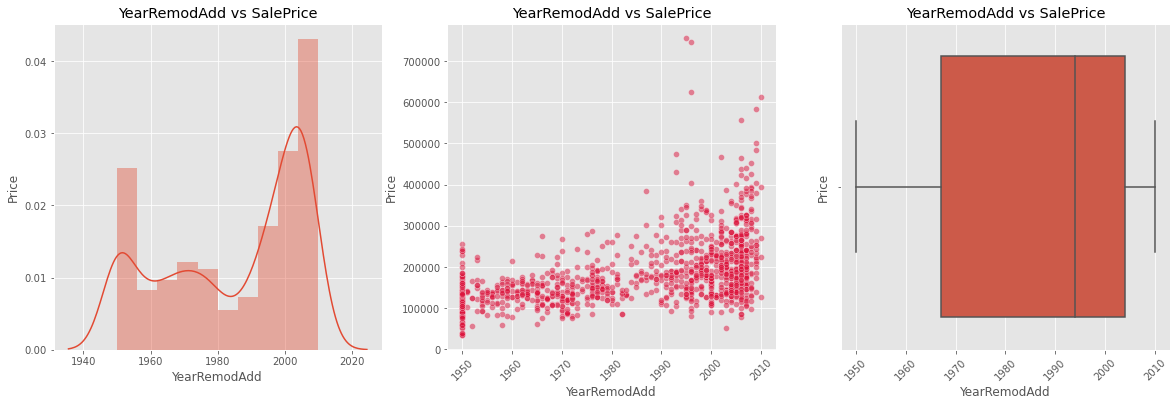

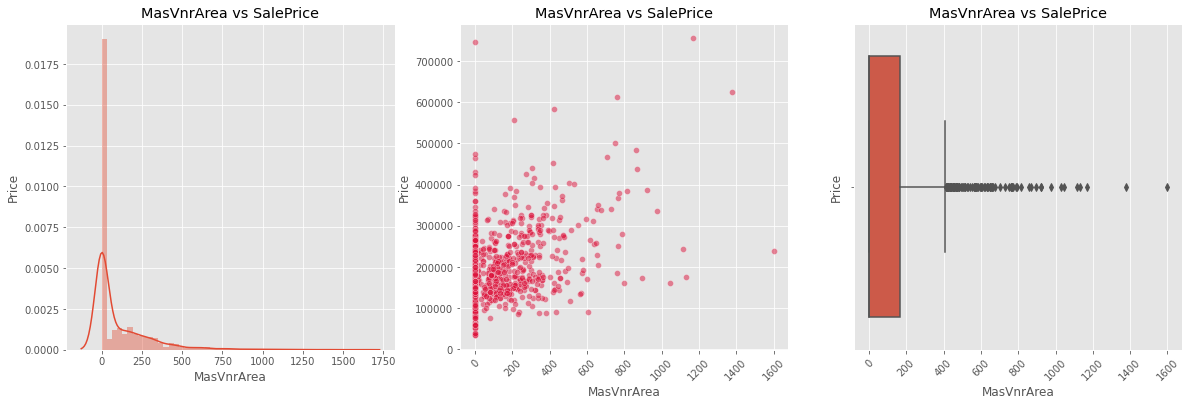

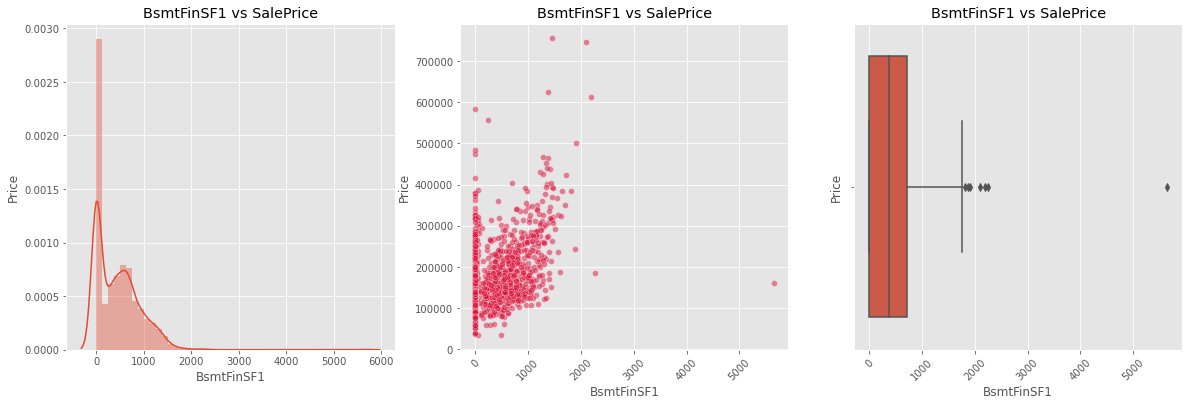

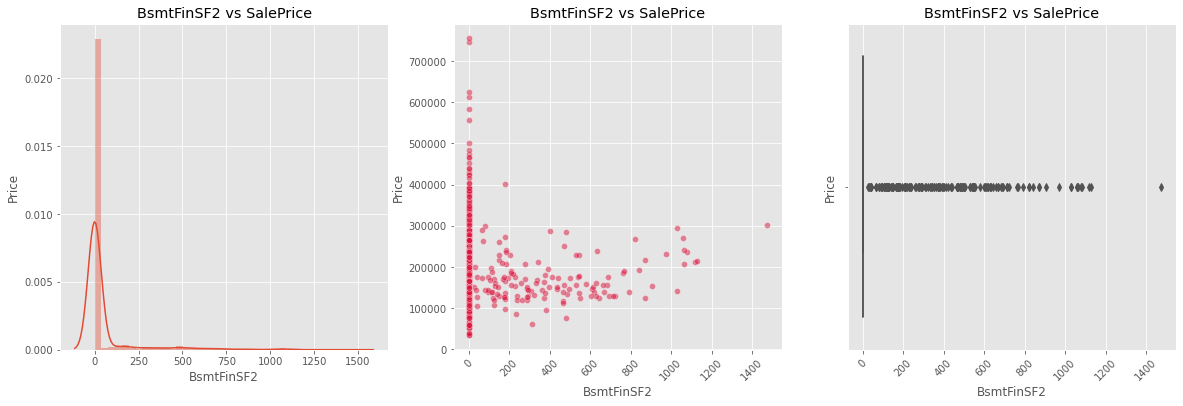

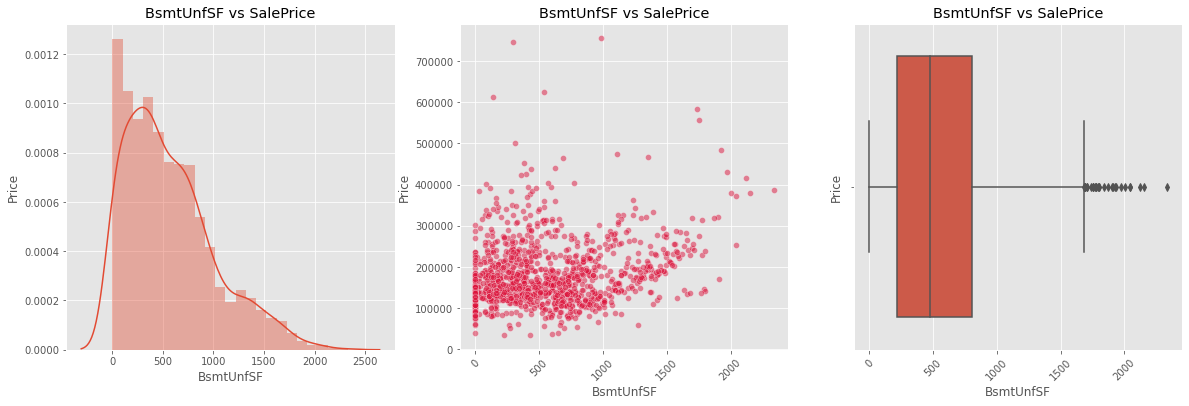

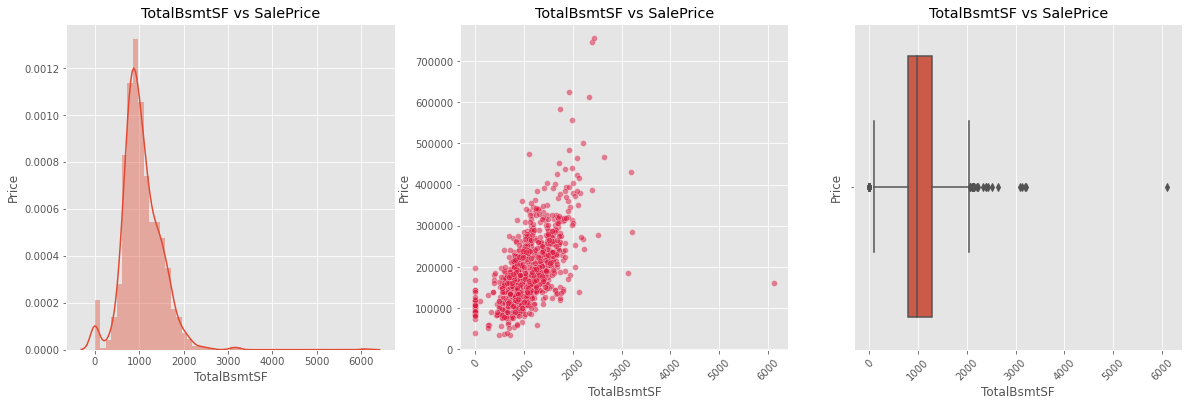

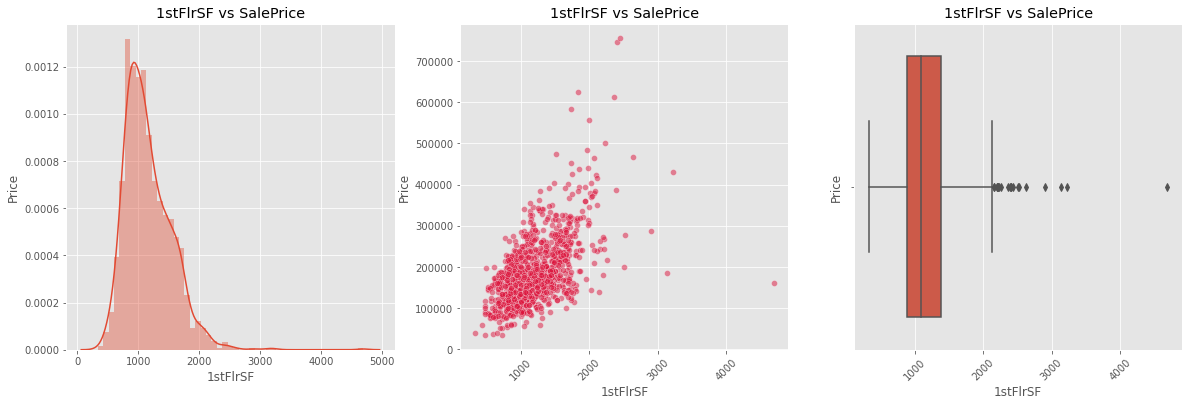

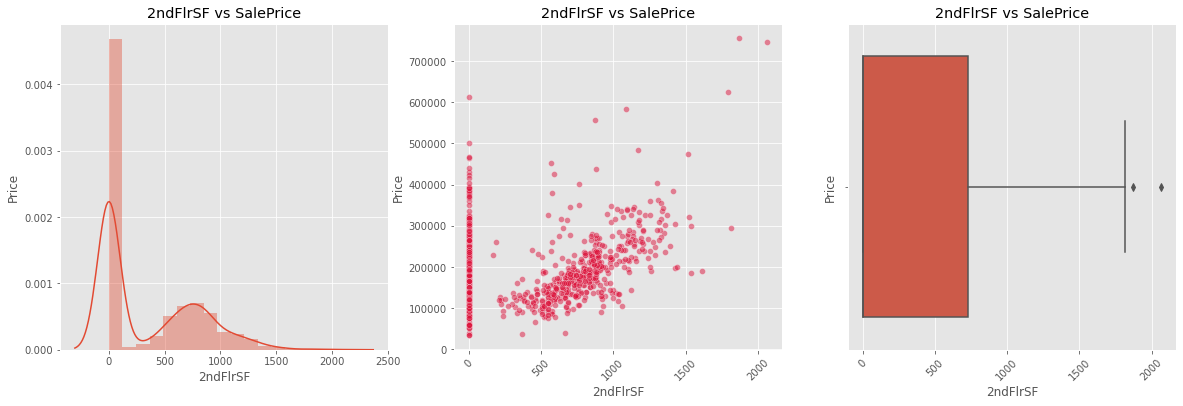

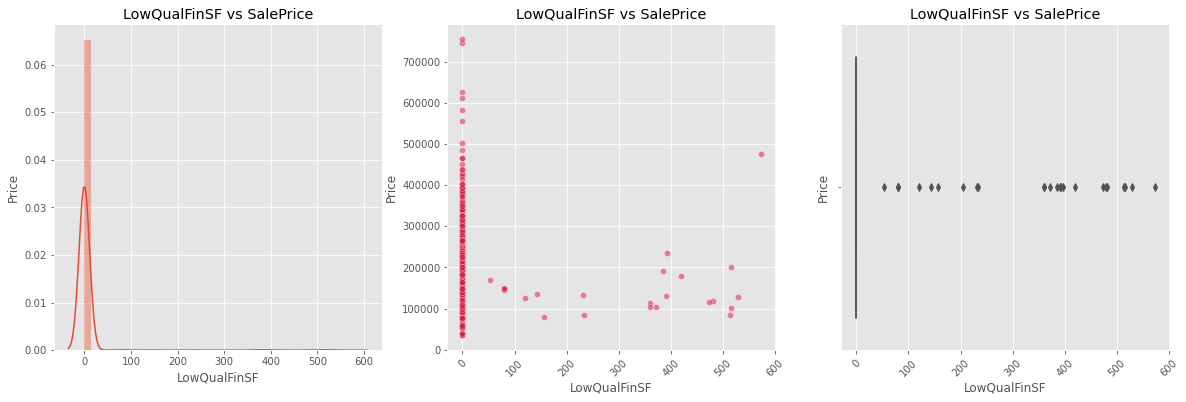

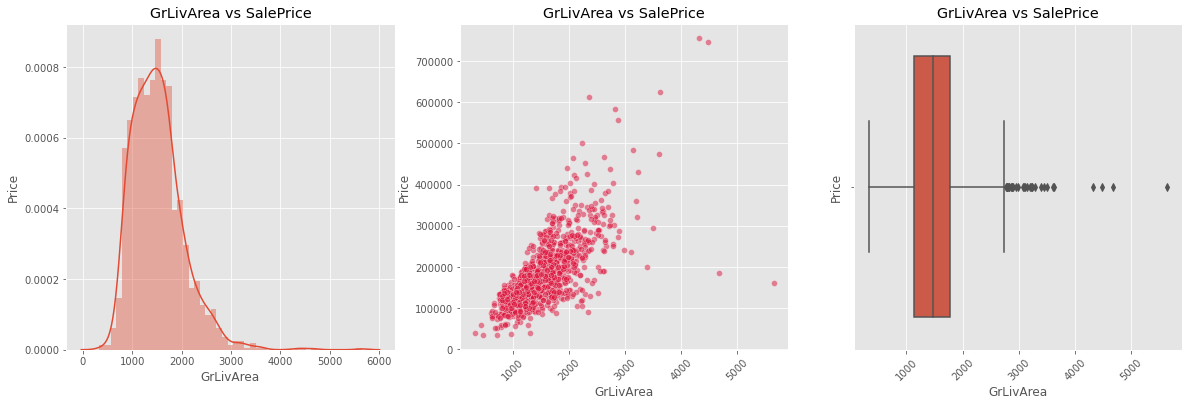

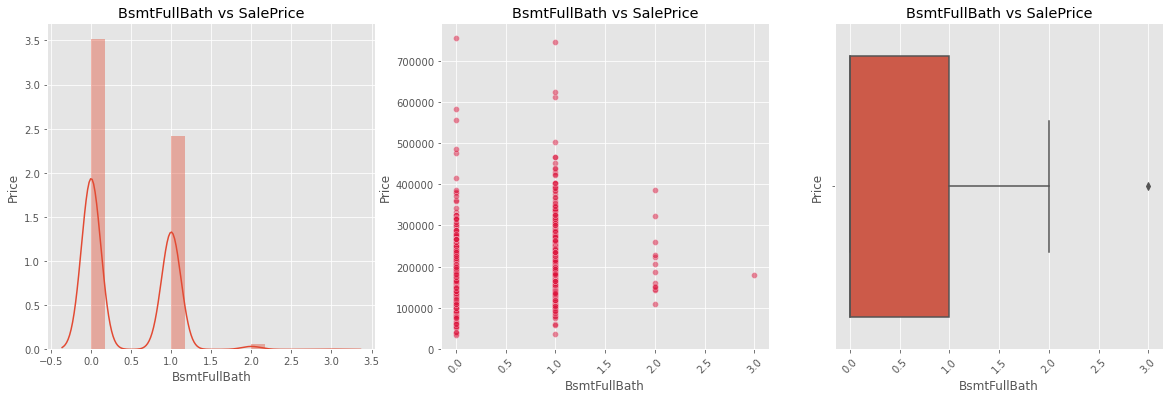

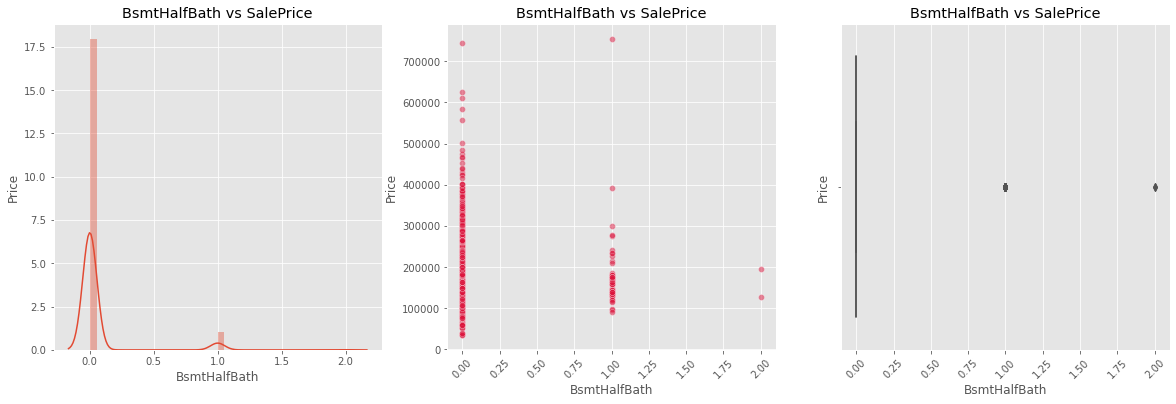

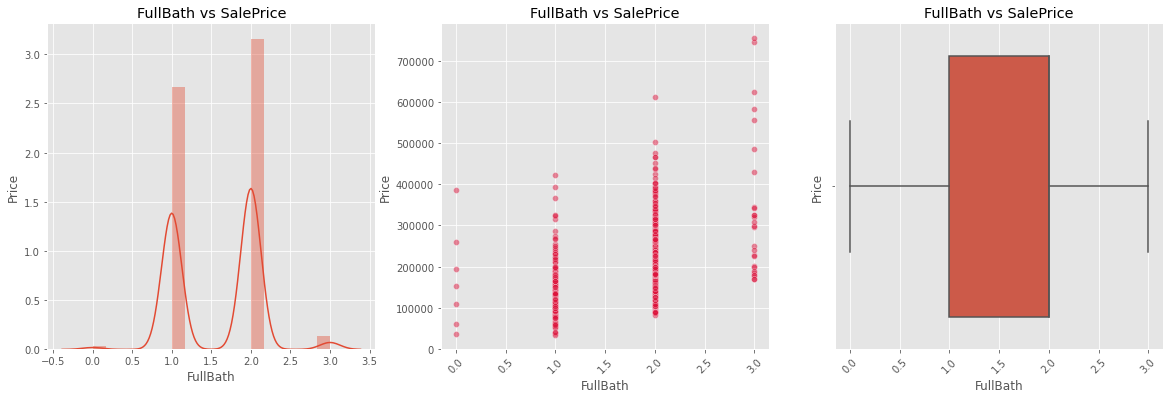

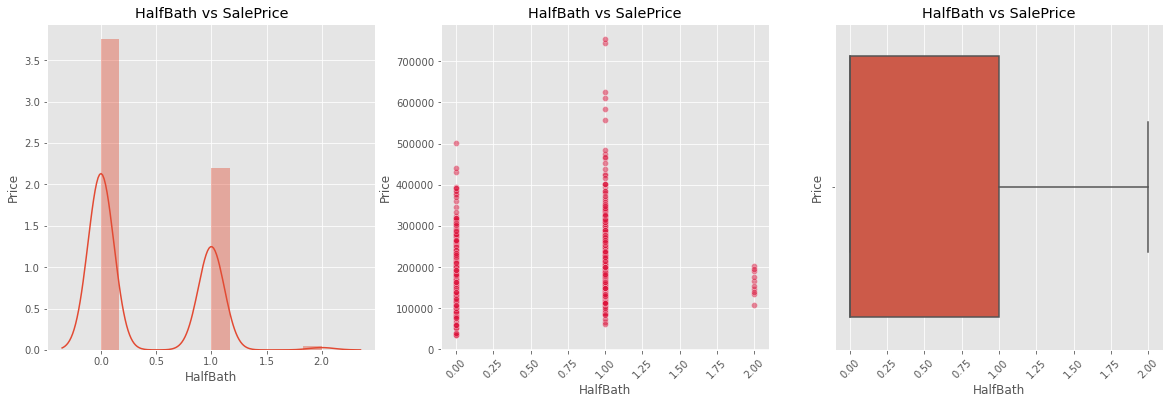

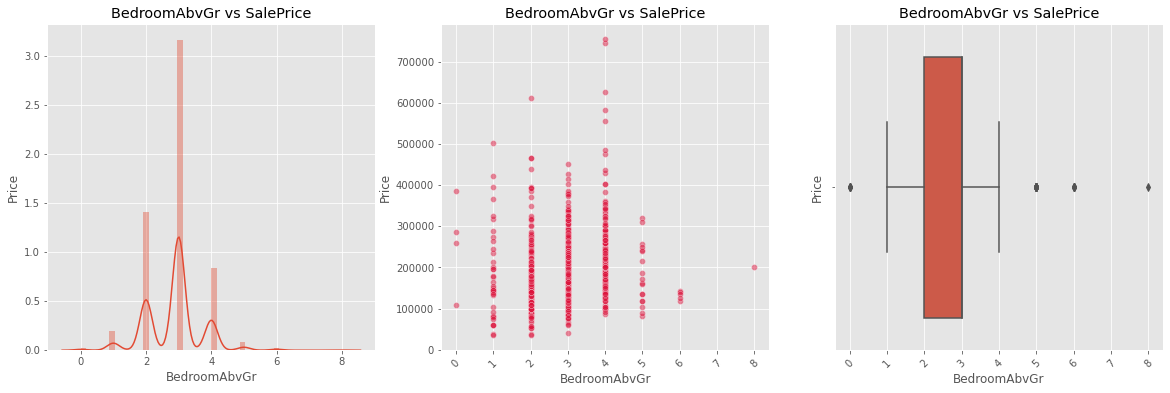

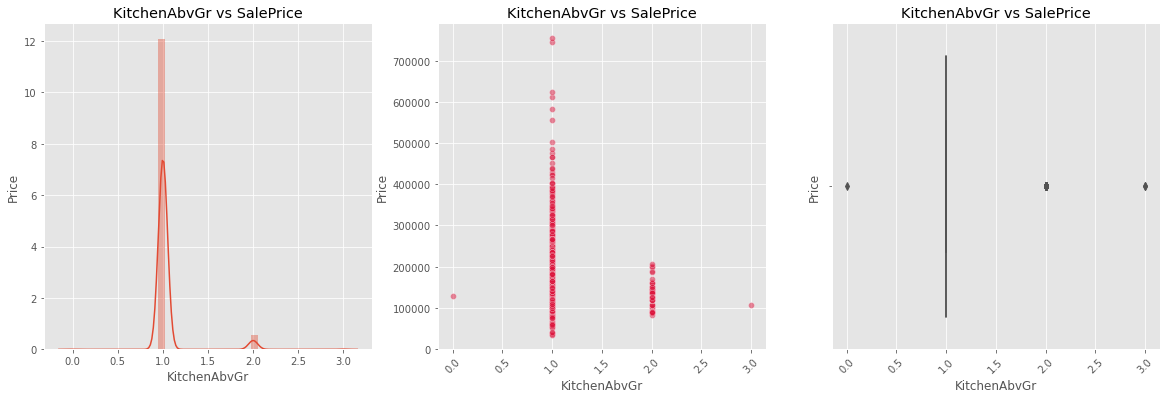

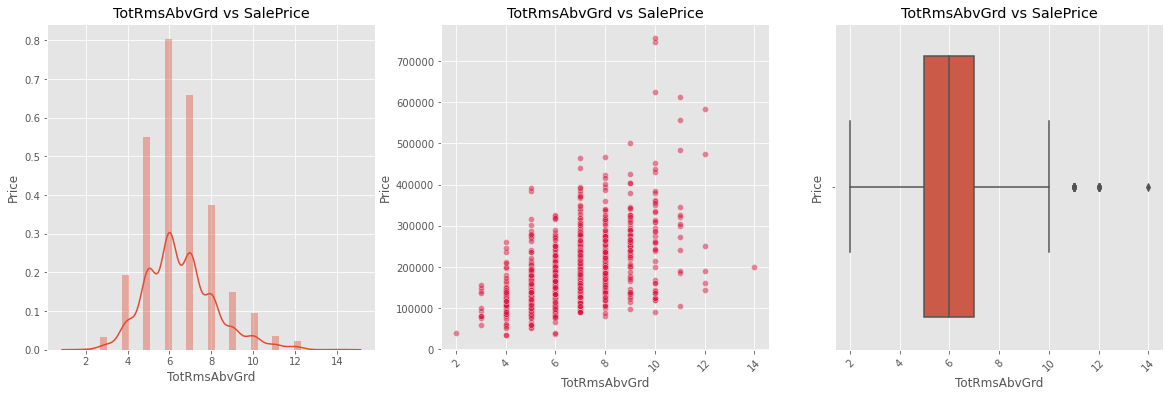

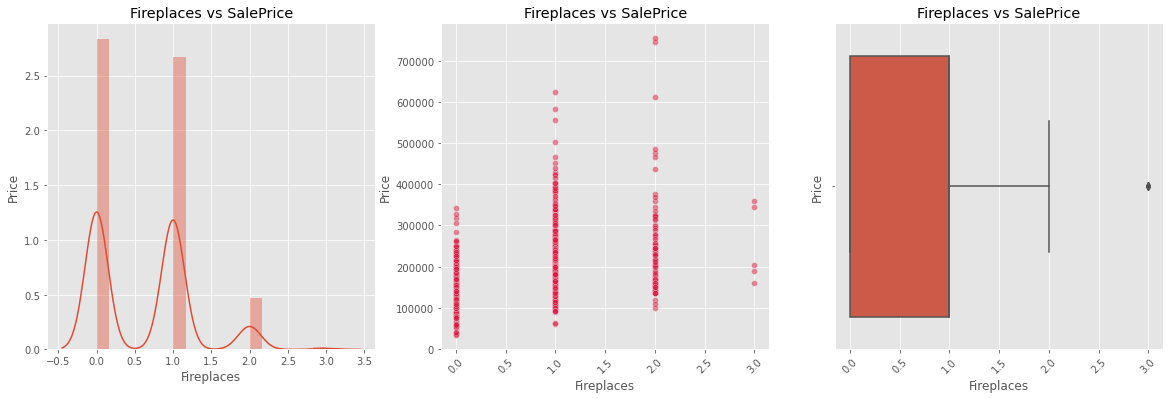

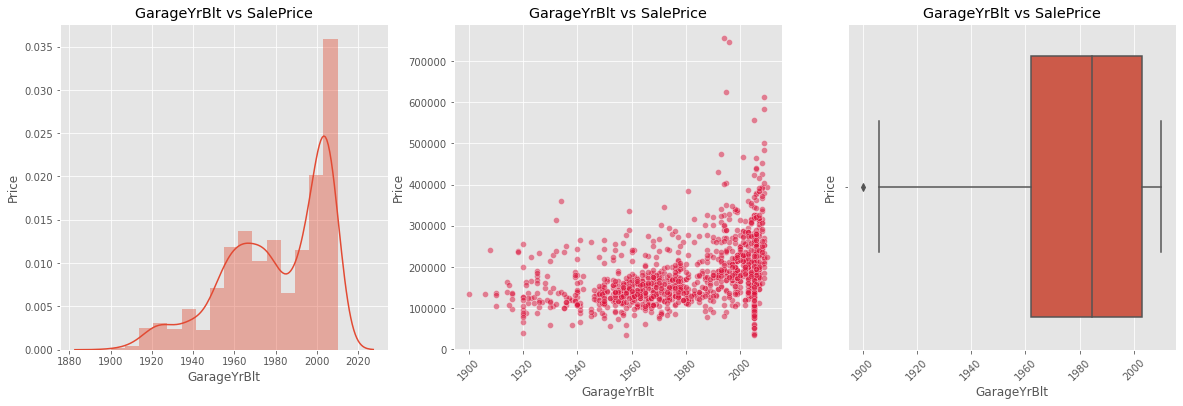

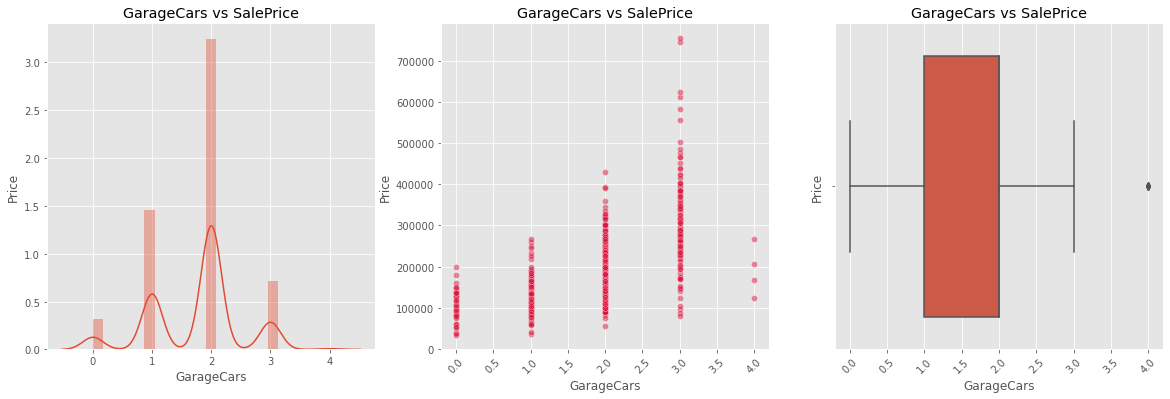

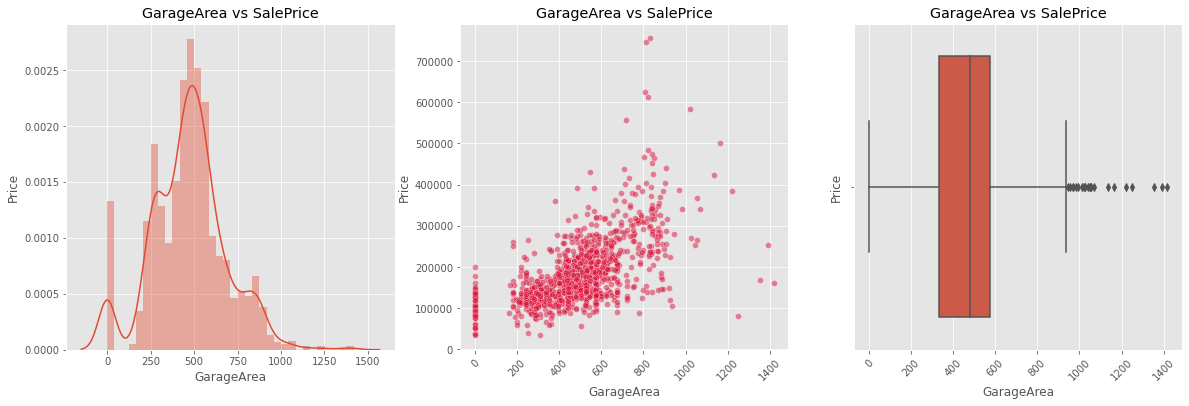

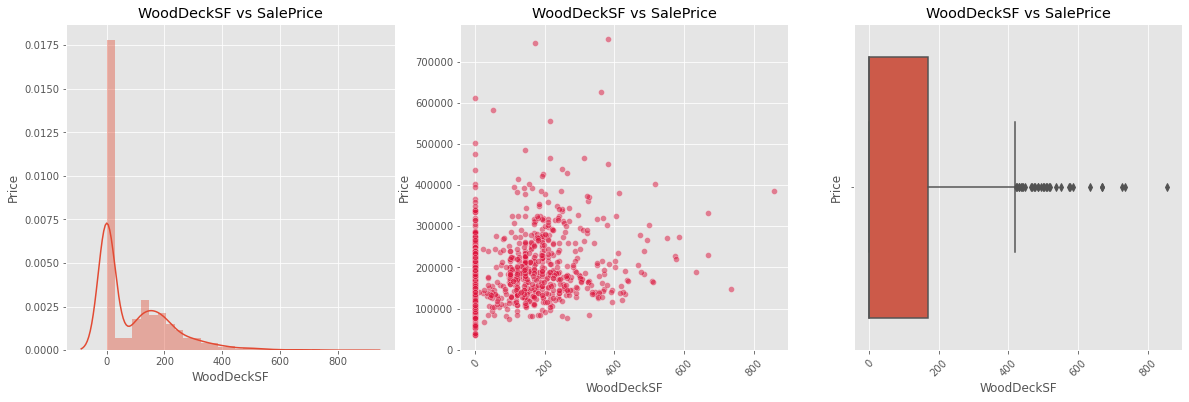

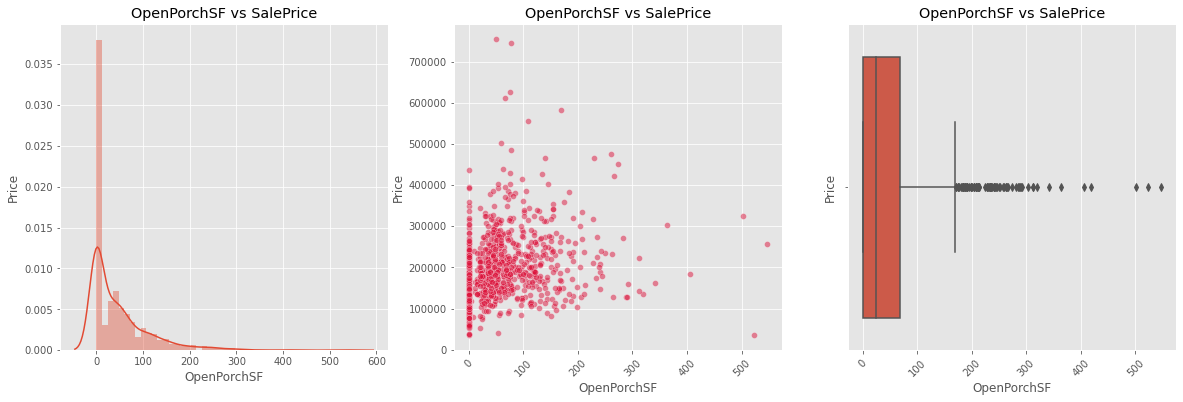

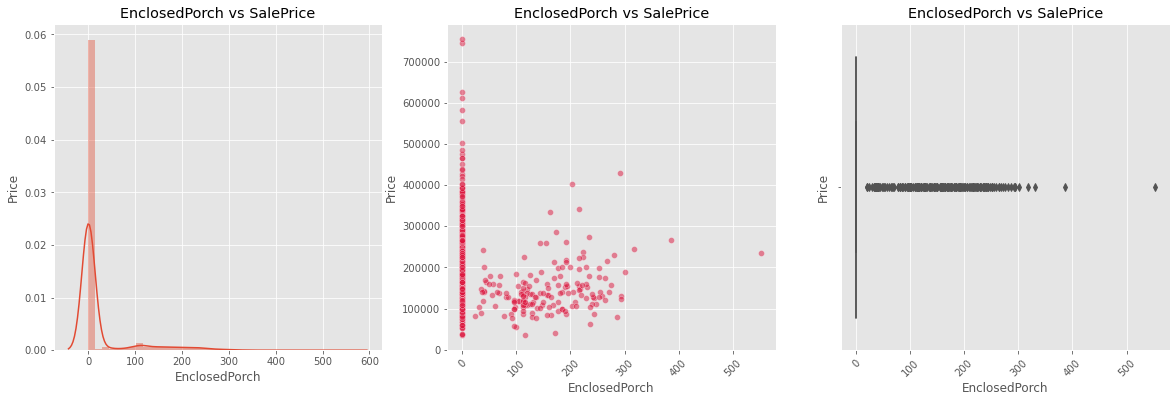

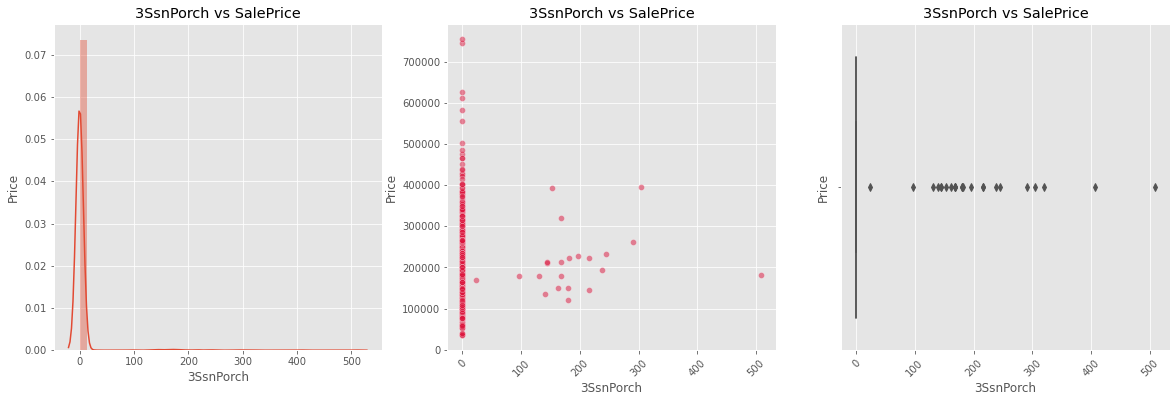

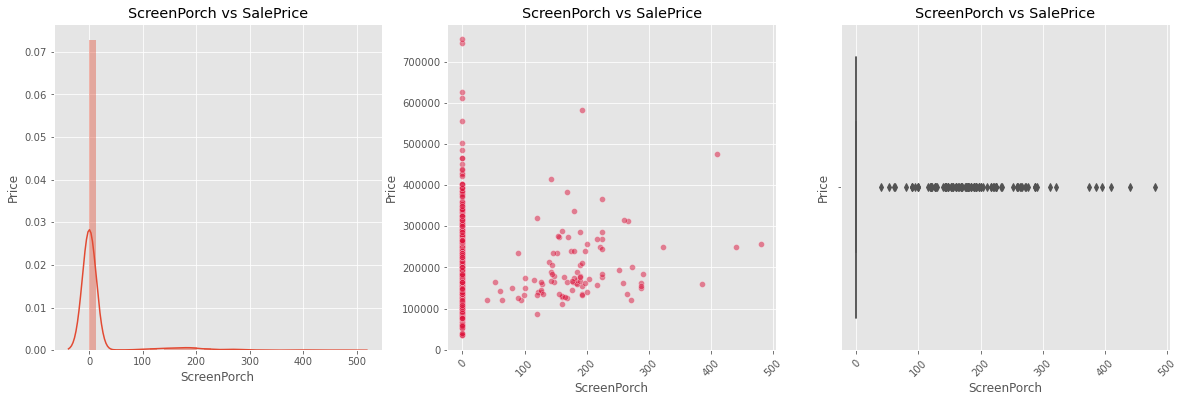

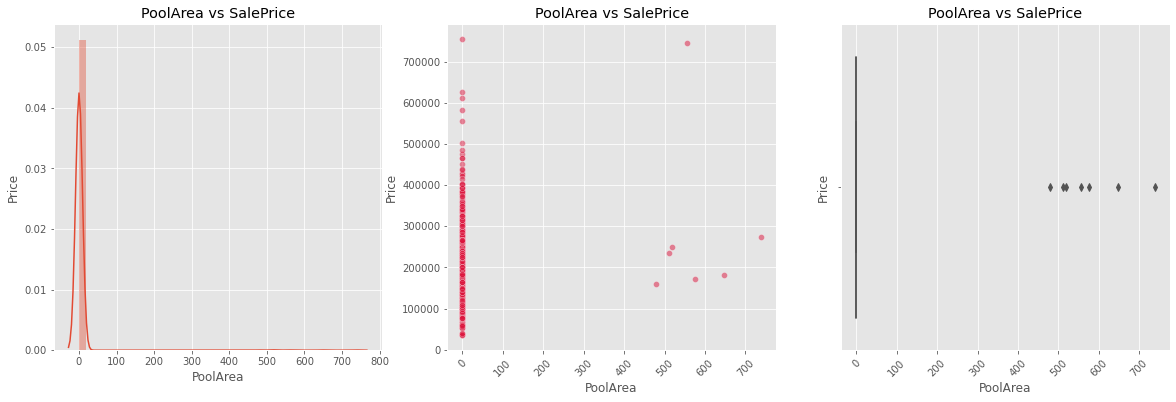

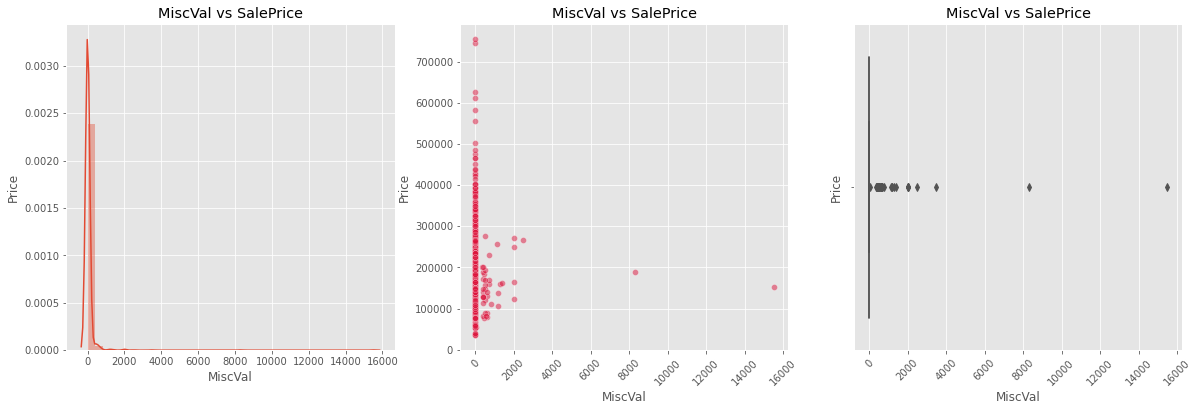

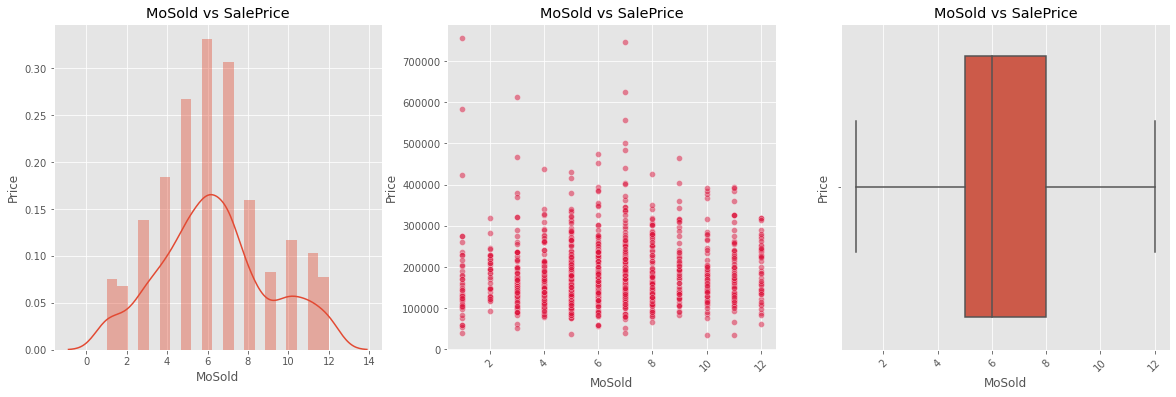

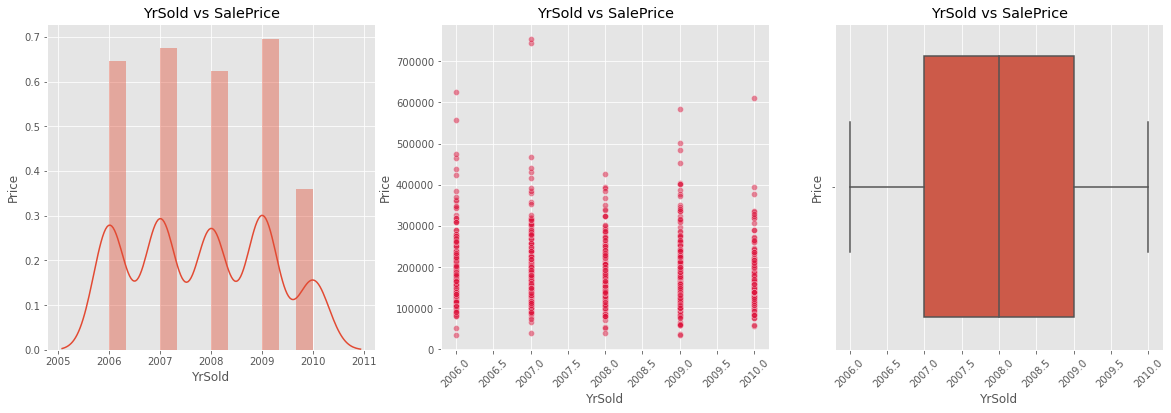

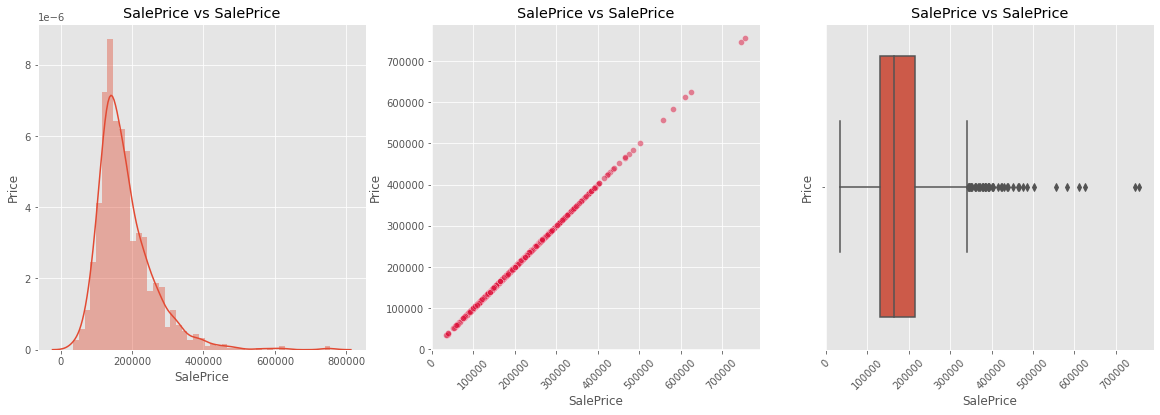

In [146]:
num_colm=[]
for i in df.columns:
    if df[i].dtype != 'object':
        num_colm.append(i)
        plt.figure(figsize=(20,6))
        ax = plt.subplot(1,3,1)
        sns.distplot(df[i])
        plt.title('{} vs SalePrice'.format(i))
        plt.ylabel('Price')
        plt.xlabel('{}'.format(i))
        ax = plt.subplot(1,3,2)
        sns.scatterplot(x=i,y = 'SalePrice', data = df, color='crimson', alpha=0.5)
        plt.title('{} vs SalePrice'.format(i))
        plt.ylabel('Price')
        plt.xlabel('{}'.format(i))
        plt.xticks(rotation=45)
        ax = plt.subplot(1,3,3)
        sns.boxplot(df[i])
        plt.title('{} vs SalePrice'.format(i))
        plt.ylabel('Price')
        plt.xlabel('{}'.format(i))
        plt.xticks(rotation=45)
        plt.show()

## Observations:

* As per the visualization it is observed that the following coloumns 'LotFrontage','LotArea','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea','GrLivArea','LowQualFinSF','GarageYrBlt','WoodDeckSF','OpenPorchSF' have outliers 
* We need to treat them using some outlier treatment technique.

<Figure size 1440x1440 with 0 Axes>

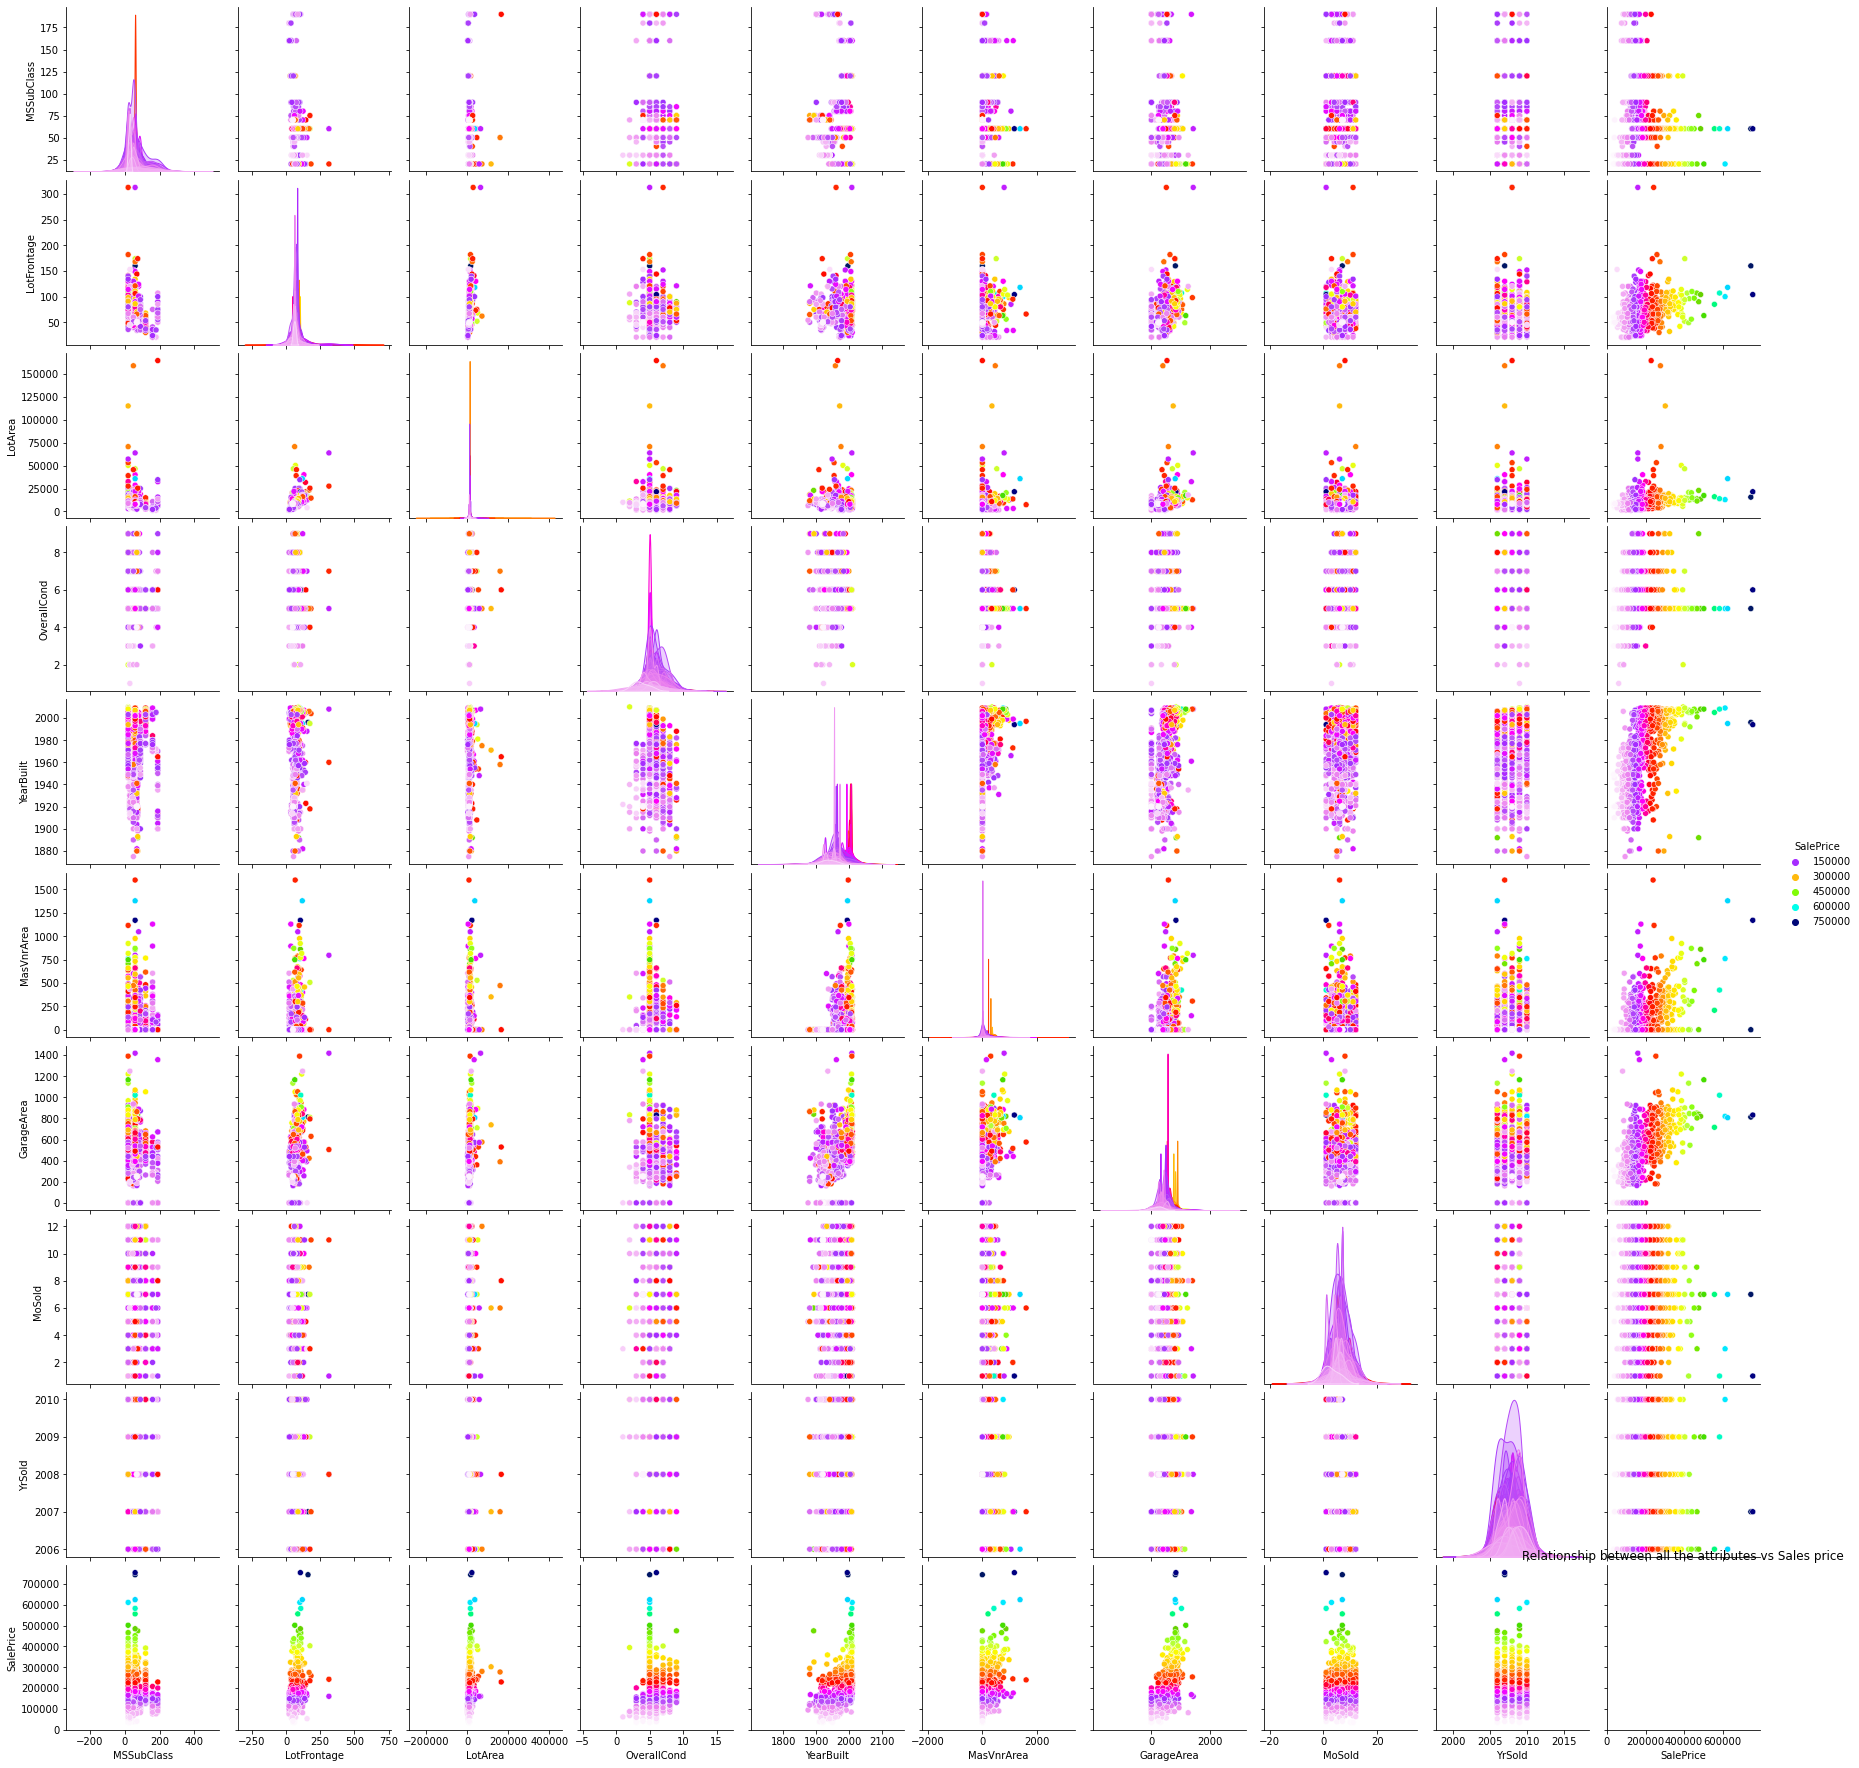

In [40]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df,vars=['MSSubClass', 'LotFrontage','LotArea','OverallCond','YearBuilt','MasVnrArea','GarageArea','MoSold','YrSold','SalePrice'], palette='gist_ncar_r',hue='SalePrice')
plt.xticks(rotation = 80)
plt.title('Relationship between all the attributes vs Sales price')
plt.ylabel('Attribute name')
plt.xlabel('Attribute name')
plt.show()

#### ID has almost unique values for all entries which is used as index. 
#### PoolQC, Alley, MiscFeature, Fence are having more than 85% of the null values in the dataset, instead of treating these values, we can proceed by dropping these values.

In [221]:
df.drop(columns=['Id','PoolQC','Alley','MiscFeature','Fence'], inplace=True)  
df.shape

(1460, 77)

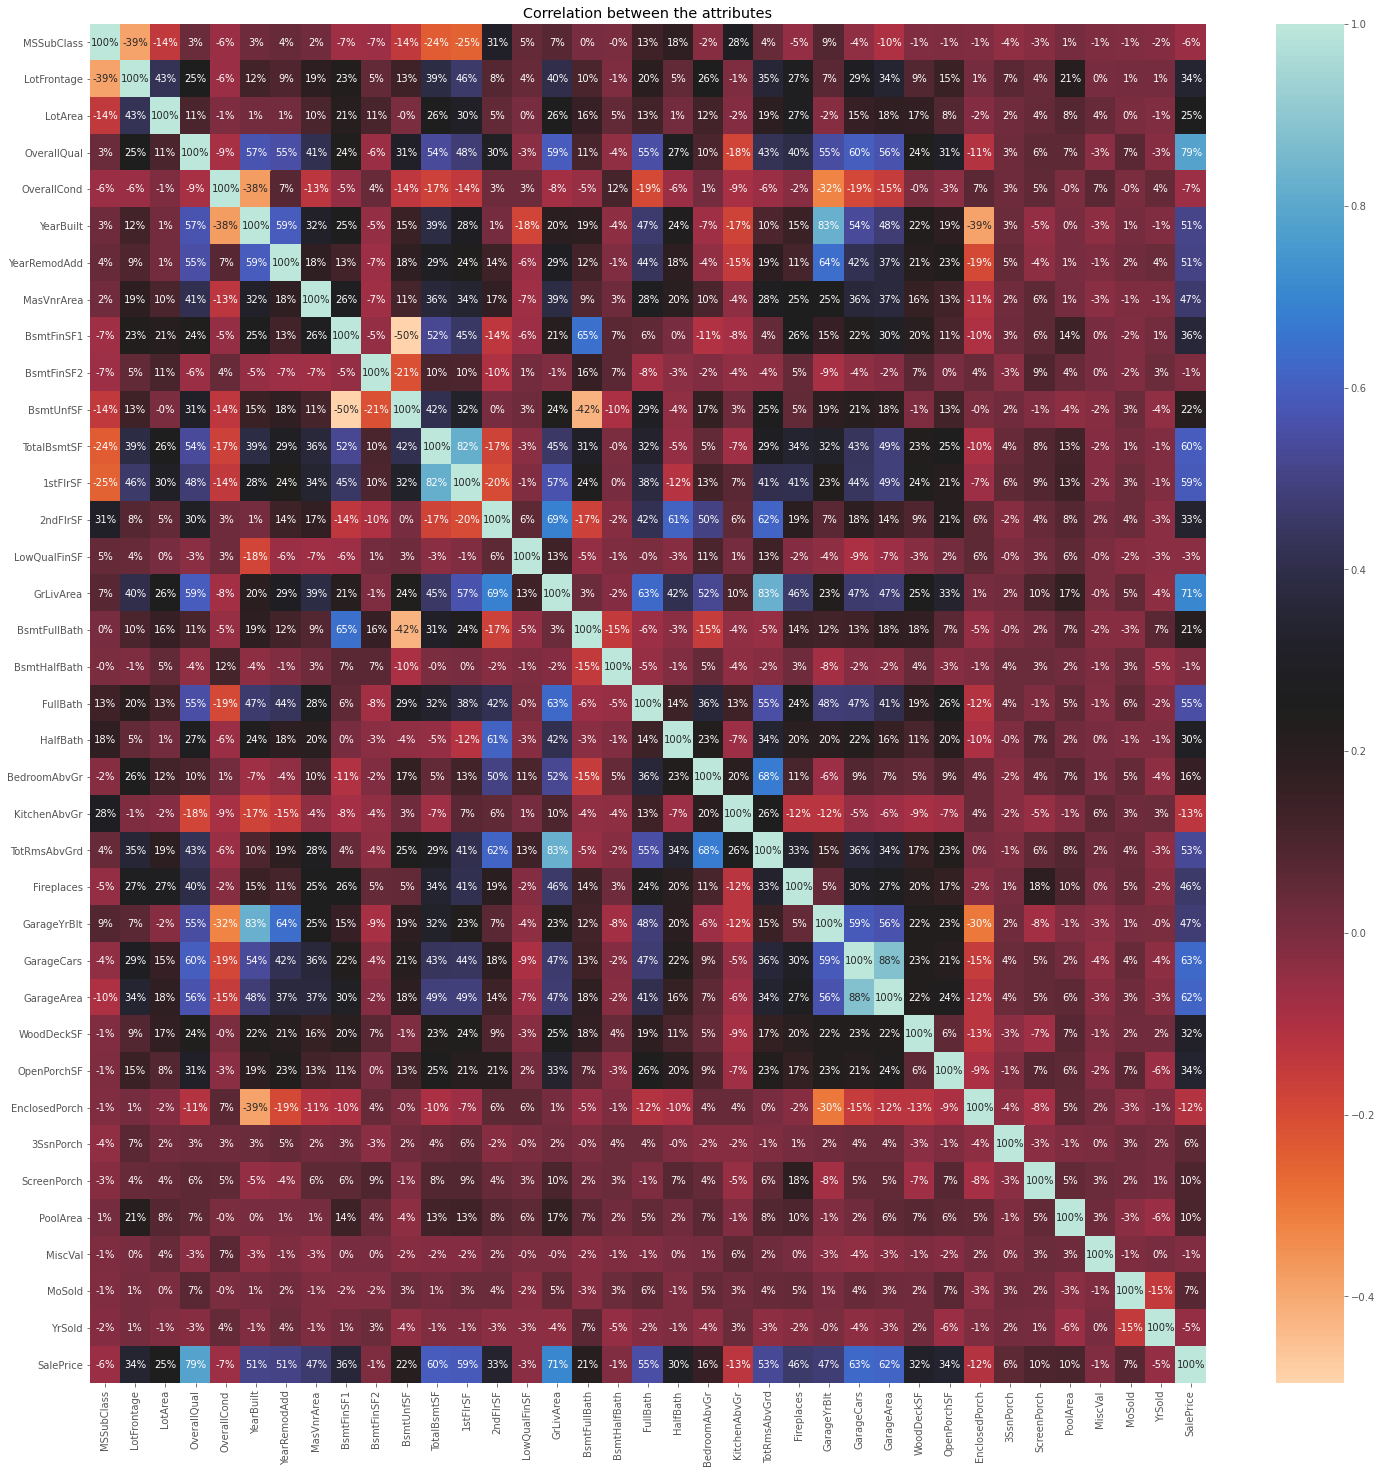

In [222]:
#checking correlation between attributes
corr = df.corr()
plt.figure(figsize=(25,25),facecolor='white')
sns.heatmap(corr, annot=True, fmt='.0%',cmap='icefire_r')
plt.title('Correlation between the attributes')
plt.show()

#### Very few values have correlation to 1, most of the values lie near to 10%

### Missing value treatment

In [42]:
Null_val

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64

In [223]:
#replacing all the null values in attributes by most frequent occurances of values.

df['LotFrontage'].replace(np.nan, df['LotFrontage'].median(), inplace=True) 
df['MasVnrType'].replace(np.nan, 'None', inplace=True)
df['MasVnrArea'].replace(np.nan, '0', inplace=True) 
df['BsmtQual'].replace(np.nan, 'TA', inplace=True) 
df['BsmtCond'].replace(np.nan, 'TA', inplace=True) 
df['BsmtExposure'].replace(np.nan, 'No', inplace=True) 
df['BsmtFinType1'].replace(np.nan, 'Unf', inplace=True) 
df['BsmtFinType2'].replace(np.nan, 'Unf', inplace=True) 
df['Electrical'].replace(np.nan, 'SBrkr', inplace=True) 
df['GarageType'].replace(np.nan, 'Attchd', inplace=True) 
df['GarageQual'].replace(np.nan, 'TA', inplace=True)
df['GarageCond'].replace(np.nan, 'TA', inplace=True)
df['GarageYrBlt'].replace(np.nan, 2005, inplace=True)
df['GarageFinish'].replace(np.nan, 'Unf', inplace=True) 
df['FireplaceQu'].fillna('NA', inplace=True)

In [213]:
#checking the null values back, we have only sale price attribute which is test data set.

Null_val = df.isnull().sum()
Null_val = Null_val[Null_val>0]

Null_val.to_frame

<bound method Series.to_frame of SalePrice    292
dtype: int64>

In [96]:
print('*******Categorical columns and their Unique records*******\n')
for i in df:
    if df[i].dtype == 'object':
        print(i,':', df[i].unique(),end='\n')

*******Categorical columns and their Unique records*******

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
Street : ['Pave' 'Grvl']
LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Condition2 : ['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
BldgType : ['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
HouseStyle : ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
RoofStyle : ['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
RoofMatl : ['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 

In [224]:
df['MasVnrArea'] = df['MasVnrArea'].astype(int)

## Observation:
1. We have these above features which are having differnt unique values, we have to convert these values using onehot encoding or Label Encoding techniques.
2. 'MasVnrArea' is a numerical attribute but it is showing string values, Let us convert this attribute into numerical one and 
3. Let us check the correlation between top 10 the independent attributes and target variables. 

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
dtype: float64


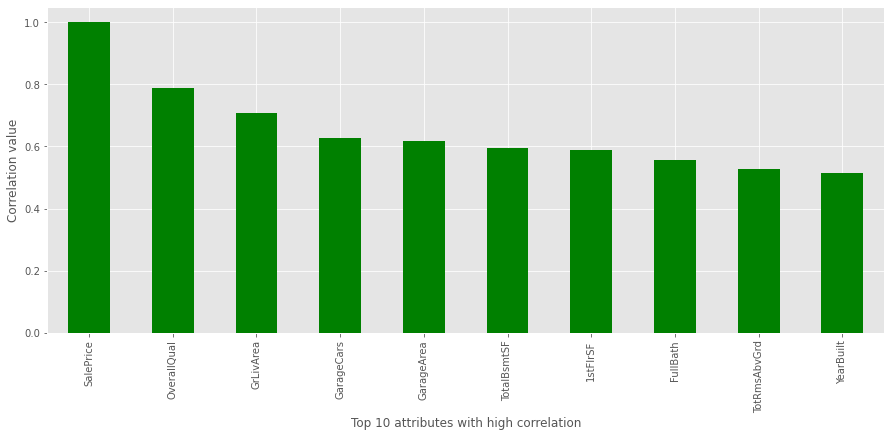

In [225]:
#checking correlation of attributes with Salesprice

corr_sale = df.corrwith(df['SalePrice']).sort_values(ascending=False).head(10)
plt.figure(figsize=(15,6))
corr_sale.plot.bar(color='green')
plt.xlabel('Top 10 attributes with high correlation')
plt.ylabel('Correlation value')
plt.style.use('ggplot') 
print(corr_sale)
plt.show()

* We see that there is linear relationship between overall condition of House, Living Area and the Sale Price. 

* Better the overall quality of the house, more will be the price of the house

# Feature Engineering


### We are creating new and useful attributes to simplify few of the attributes which have various columns


In [226]:
#Pool 1 if pool is present, 0 if pool is not present
df['Pool'] = df['PoolArea'].apply(lambda x:1 if x>0 else 0)

#Garage 1 if Garage is present, 0 if Garage is not present
df['Garage'] = df['GarageArea'].apply(lambda x:1 if x>0 else 0)

#Fireplace 1 if Fireplace is present, 0 if Fireplace is not present
df['Fireplace'] = df['Fireplaces'].apply(lambda x:1 if x>0 else 0)

#Basement 1 if Basement is present, 0 if Basement is not present
df['Basement'] = df['TotalBsmtSF'].apply(lambda x:1 if x>0 else 0)

#total area = basement area+1stfloor area + 2nd floor area
df['Total_SF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF'] 

df.drop(columns=['PoolArea','GarageArea','Fireplaces','TotalBsmtSF','1stFlrSF','2ndFlrSF'], inplace=True)


### Outlier treatment using Z_Score

In [227]:
# let us treat outliers present in the dataset using zscore methods
outlier_col= ['LotFrontage','LotArea','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Total_SF','Garage','GrLivArea','LowQualFinSF','GarageYrBlt','WoodDeckSF','OpenPorchSF']

In [235]:
print('Shape of dataset before removal of outliers: ',df.shape)
#find z score of outlier attributes
z_sco = zscore(df[outlier_col])
abs_zsc = np.abs(z_sco)
df = df[(abs_zsc<3).all(axis=1)]

print('Shape of dataset before removal of outliers: ',df.shape)

Shape of dataset before removal of outliers:  (1460, 76)
Shape of dataset before removal of outliers:  (1197, 76)


Data lost:
    (1460-1197)/1460*100 
    = 18.01% 
    
## Let us check the skewness of the data and transform the columns if there is skewness

In [237]:
df.skew()

MSSubClass        1.352582
LotFrontage       0.108458
LotArea           1.445124
OverallQual       0.145886
OverallCond       0.781971
YearBuilt        -0.605926
YearRemodAdd     -0.505186
MasVnrArea        1.577235
BsmtFinSF1        0.580463
BsmtFinSF2        4.119654
BsmtUnfSF         0.801829
LowQualFinSF     16.134549
GrLivArea         0.583448
BsmtFullBath      0.535501
BsmtHalfBath      4.142525
FullBath         -0.092703
HalfBath          0.658424
BedroomAbvGr      0.010101
KitchenAbvGr      5.002769
TotRmsAbvGrd      0.618870
GarageYrBlt      -0.634864
GarageCars        0.196971
WoodDeckSF        1.023800
OpenPorchSF       1.486135
EnclosedPorch     2.890550
3SsnPorch         9.538878
ScreenPorch       4.019004
MiscVal          23.977607
MoSold            0.217459
YrSold            0.103546
SalePrice         1.385670
Pool             19.924789
Garage            0.000000
Fireplace        -0.092109
Basement         -6.084280
Total_SF          0.364410
dtype: float64

In [244]:
#reducing the skewness of attributes using power transformation method
power_tfr = PowerTransformer()
for i in outlier_col:
    df[i] = power_tfr.fit_transform(df[i].values.reshape(-1,1))

In [ ]:
#visualizing the attributes again

for i in outlier_col:
    plt.figure(figsize=(12,6)) 
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.title('{} vs SalePrice'.format(i))
    plt.ylabel('Price')
    plt.xlabel('{}'.format(i))
    plt.xticks(rotation=45)
    
    plt.subplot(1,2,2)
    sns.distplot(df[i],color='blue')
    plt.title('{} vs SalePrice'.format(i))
    plt.ylabel('Price')
    plt.xlabel('{}'.format(i))
    plt.xticks(rotation=45)
    
    plt.show()
  
        

### Model Building

Let us prepare the data to build by learning and generalizing from training data, then apply that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. 

In [335]:
#splitting the data back to train and test data

train_df = df.loc[df['label']=='train']
test_df = df.loc[df['label']=='test']

#droping label and sale price which was added

train_df.drop(columns= 'label',axis=1, inplace=True)
test_df.drop(columns= ['label','SalePrice'],axis=1, inplace=True)

print(len(train_df), len(test_df))

954 243


In [336]:
#converting categorical columns into numerical columns using label encoding technique

lab_enc = LabelEncoder()
for i in train_df:
    if df[i].dtype=='object':
        train_df[i] = lab_enc.fit_transform(train_df[i])
        
for i in test_df:
    if df[i].dtype=='object':
        test_df[i] = lab_enc.fit_transform(test_df[i])

### We have encoded the categorical dataset into numerical data set using label encoding
Let us standardize the data
### Standardization

In [329]:
#standardization
X = train_df.drop(columns='SalePrice')
y = train_df['SalePrice']

x_val_test = test_df
print(len(X), len(y), len(x_val_test))

954 954 243


In [337]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_test_scalar = scalar.fit_transform(x_val_test)
print(len(X_scaled), len(X_test_scalar))

954 243


### PCA
##### We are using Principal component analysis (PCA) to compute the principal components and use them to processing data where multi-colinearity is high between the features/variables.

Text(0.5, 1.0, 'PCA')

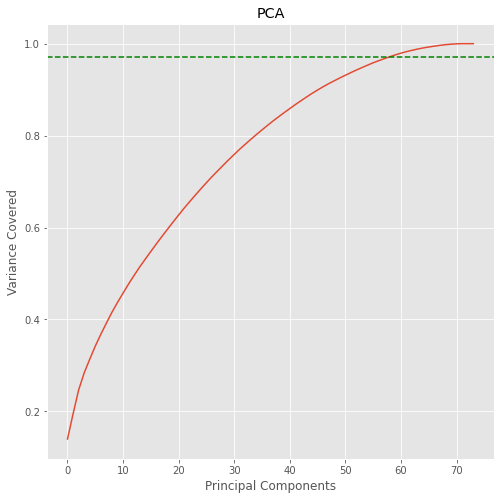

In [318]:
#pca
pca = PCA()
pca.fit_transform(X_scaled)
 
plt.figure(figsize=(8,8)) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.axhline(y=0.97, color='g', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

### Observations:
Around 60 principal would cover > 95% of variance. It is safe to consider starting 60 components.

In [338]:
#for trained data
pca= PCA(n_components=60)
new_pcomp = pca.fit_transform(X_scaled)
X_scaled = pd.DataFrame(new_pcomp, columns=list(np.arange(1,61)))

#for test data
pca= PCA(n_components=60)
new_pcomp = pca.fit_transform(x_val_test)
x_val_test = pd.DataFrame(new_pcomp, columns=list(np.arange(1,61)))

In [339]:
print(len(X_scaled),len(x_val_test))

954 243


### Splitting the dataset into train and test data set

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((715, 60), (239, 60), (715,), (239,))

## 1. Linear Model

*******************Results********************
The r2 score is: -0.2922972819074321
The mean absolute error 22293.29548223539
The mean squared error 5324342570.150042
root mean square error 72968.0928224799
The cross validation score 0.853750874357384

*****************XXXXXXXXXXX********************


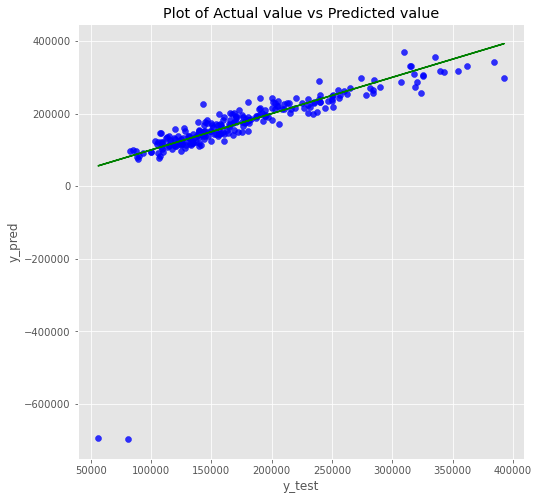

In [347]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Lasso

*******************Results********************
The r2 score is: -0.13709441057965255
The mean absolute error 21860.80999030723
The mean squared error 4684897400.382047
root mean square error 68446.31034893004
The cross validation score 0.8538211285647306

*****************XXXXXXXXXXX********************


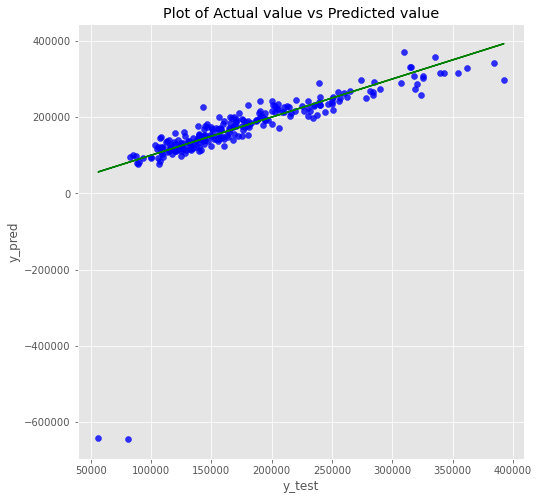

In [350]:
lass_lm = Lasso()
lass_lm.fit(X_train, y_train)
y_pred = lass_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lass_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. Random Forest Regressor

*******************Results********************
The r2 score is: 0.8550753155559705
The mean absolute error 17051.8410041841
The mean squared error 597098421.2796476
root mean square error 24435.597420150127
The cross validation score 0.8504838471087668

*****************XXXXXXXXXXX********************


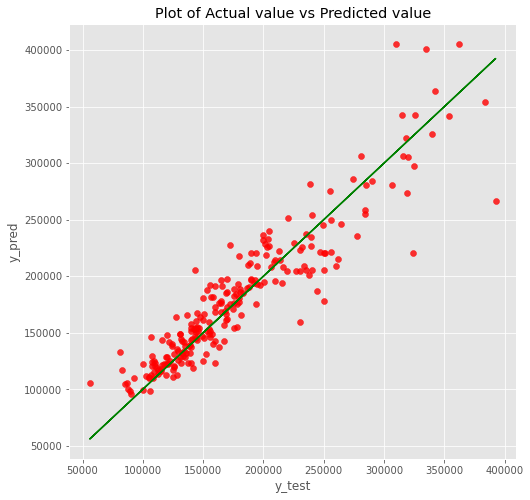

In [353]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. GradientBoosting Regressor

*******************Results********************
The r2 score is: 0.8640840800316256
The mean absolute error 16256.91381846423
The mean squared error 559981769.5047649
root mean square error 23663.93393974816
The cross validation score 0.8623307598907164

*****************XXXXXXXXXXX********************


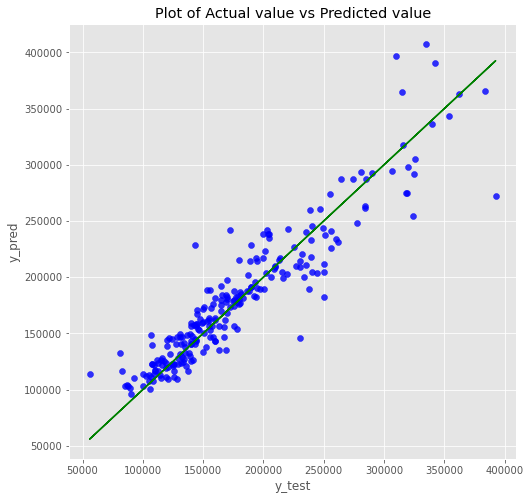

In [356]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGB Regressor

*******************Results********************
The r2 score is: 0.8349513717054804
The mean absolute error 17508.295828974897
The mean squared error 680010280.9752166
root mean square error 26077.00674876656
The cross validation score 0.8439303928279088

*****************XXXXXXXXXXX********************


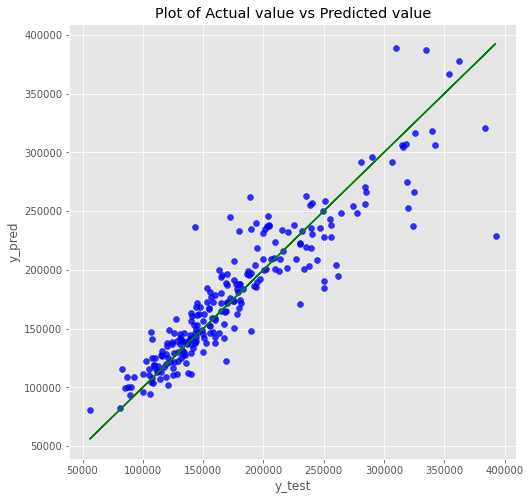

In [357]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.6304913931200763
The mean absolute error 27332.66108786611
The mean squared error 1522397696.870293
root mean square error 39017.9150759019
The cross validation score 0.6289876765624598

*****************XXXXXXXXXXX********************


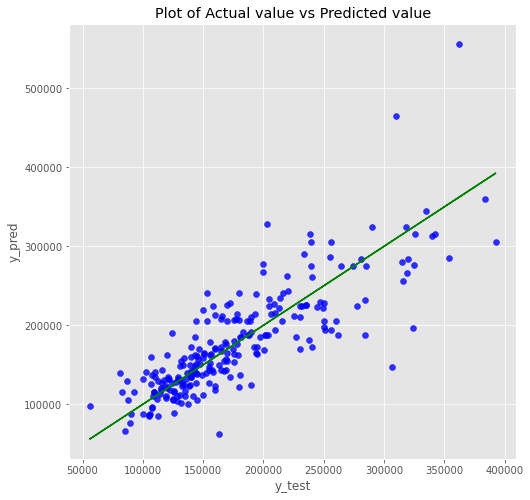

In [360]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.6304913931200763
The mean absolute error 27332.66108786611
The mean squared error 1522397696.870293
root mean square error 39017.9150759019
The cross validation score 0.7875759243175724

*****************XXXXXXXXXXX********************


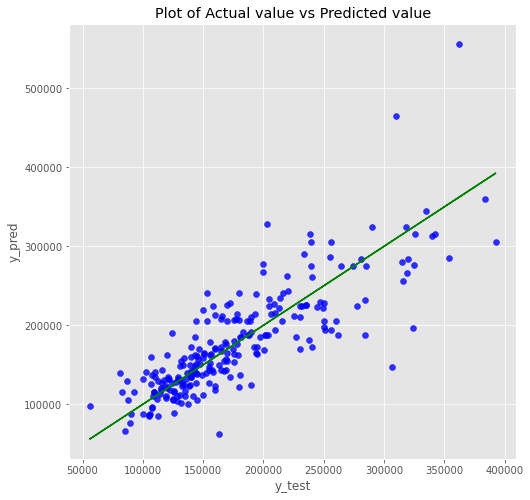

In [361]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(ada_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

We can see too big values in MAE and MSE, that is due to individual parameters we got after the encoding of the Attributes.
As per the models we trained, we got several CV score, and graphs for the values predicted.
Gradient boosting algorithm has least difference between CV score to R2score value. Hence choosing Gradient boosting to be BEST Model.

Let us tune the hyper parameters and check if we can increase the accuracy of the model.

## Hyperparameter tuning

In [363]:
grid_param = {'max_depth':range(1,15,2),'learning_rate':np.arange(0.2,1,0.2),'min_samples_split':range(4,8,2),'min_samples_leaf':range(1,10,2),}
grid_reg = GridSearchCV(gbr,param_grid=grid_param,n_jobs=-2,verbose=2)
grid_reg.fit(X_train, y_train)
grid_reg.best_params_

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


{'learning_rate': 0.4,
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

*******************Results********************
The r2 score is: 0.8640840800316256
The mean absolute error 16256.91381846423
The mean squared error 559981769.5047649
root mean square error 23663.93393974816
The cross validation score 0.8451248933587474

*****************XXXXXXXXXXX********************


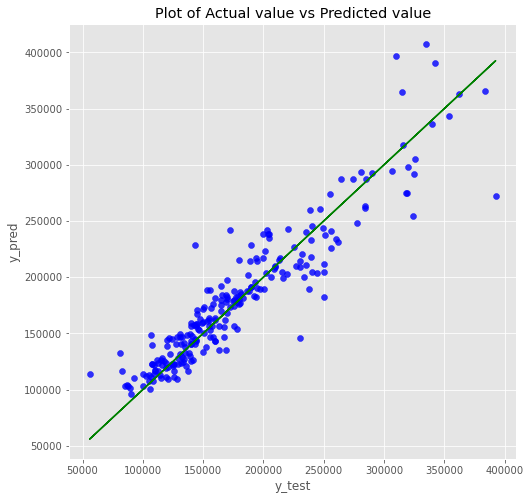

In [364]:
grad_grid = GradientBoostingRegressor(learning_rate=0.4, max_depth=1, min_samples_leaf=3, min_samples_split=4)

grad_grid.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(grad_grid, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [367]:
y_pred = grad_grid.predict(x_val_test)

print("*******************Results********************")
cv = cross_val_score(grad_grid, x_val_test,y_pred,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The cross validation score 0.889280939712355

*****************XXXXXXXXXXX********************


## Saving the Model

#### Let us save the best model into pickle file.

In [368]:
import pickle

file = open('House Price Prediction.pkl', 'wb')

pickle.dump('grad_grid',file)